# Examen Final

## Fecha de Entrega Máxima: Sábado 24 de Septiembre 10:00 am
El examen consistirá en preguntas teóricas y prácticas. Abarcará cada uno de los libros:

`lec06-convolutional`

`lec07-Recurrent Neural Network`

`lec08-Reinforcement Learning`

`lec09-Series de Tiempo`

`lec10-Autoencoders`



# `lec06-convolutional`

**Parte Teórica**
1. ¿Qué es una Red Convolutional?
2. ¿Cuál es la estructura en cuanto a capas de una red CNN?
3. ¿Qué es un Feature Map?
4. ¿Qué beneficio encuentran de Anidar Capas Convolucionales?
5. ¿Por qué la última Capa es Dense?

**Parte Práctica**


1. Utilicen una Red Feed-Forward como la que vimos en clase para base de `cifar10` para clasificar esas imágenes. 

    1.1 Carguen Datos
    
    1.2 Normalicen Datos
    
    1.3 Definan Red (Libre Escoger el número de Capas, Neuronas, Funciones de Activación)
    
    1.4 Compilen red con SGD, Categorical_CrosEntropy y Accuracy
    
    1.5 Entrenen Red con 100 epochs. 
    
    1.6 Hagan un Cross-Validation de 5 Folds. Pueden usar la función desarrollada en clase o el wrapper de Keras. 
    
    1.7 Grafiquen las curvas de Aprendizaje

Ahora: 
1. Propongan una Red Convolucional con mejor Accuracy en el Cross-Validation con 5 Folds 
2. ¿Por qué encontran un mejor modelo contra la Feed-Forward?

### parte teorica
#### 1
Una red convolucional es un framework de deep learning que permite analizar objetos que tienen una estructura espacial. Permite que el input tenga dimensiones en 1d (Vector), 2D(Matriz) o incluso 3D. Se diferencia de la red normal, porque en la normal, para analizar una imagen teniamos que hacer un flatten() de los datos y convertirlo siempre en un vector, mientras que en esta red se permite conservar la información de la estructura espacial de la imagen y, ademas, en caso de que las caracteristicas de la imagen cambien de posición, tambien las detectaria, a comparación de una red normal que le seria dificil detectar la imagen si sus features cambian de posición. la red convolucional se apalanca de "convoluciones" las cuales son operaciones punto matriciales que se hacen entre un filtro definido y segmentos de la matriz de datos input. Esta matriz arroja otra matriz de dimensiones reducidas a la original a la cual se le aplica la función de activación y luego se hace un pooling para reducir la carga computacional y aun cuando aumenta un poco el sesgo.

#### 2
la estructura de una red CNN es de la siguiente manera:
- Nodos de inputs donde estan las matrices con los datos.
- Capa con las convoluciones, en las cuales se define las dimensiones del filtro a usar y se prueban un set de filtros diferentes para cada input. al resultado de las convoluciones se le aplica la funcion de activación.
- Pooling layer: se aplica una transformación que reduce las dimensiones de la matriz, esto permite tanto reducir el overfitting como disminuir la exigencia computacional de la red.
- SI se quieren mas layer ocultas, se hacen tantas (convolucion - pooling ) layers como se definan.
- Se hace un flatten() de la ultima capa(convolution-pooling)
- Se conecta la capa del flatten a una capa de salida que idealmente deberia tener tantos nodos como categorias tenga la base de datos.
#### 3
Un Feature map es como se le denomina al resultado de una convolución y es llamado de esta manera ya que cada uno de los filtros que se testean en la matriz de input tiene el fin de encontrar patrones de formas en la imagen, por ejemplo, usar la matriz identidad como filtro de data mas importancia a secciones de la imagen que posean lineas diagonales(feature).
#### 4
Anidar capas convolucionales permite encontrar diferentes tipos de caracteristicas, por ejemplo por nivel de complejidad tambien, una puede ver lineas, la otra circulos, la otra ya puede identificar los razgos de un ojo, etc.
#### 5
Esto es ya que la ultima capa es la que busca predecir la categoria de la imagen, para esto, tiene que conectar los resultados de todos los filtros aplicados dentro de las diferentes capas de la red, ya que de esta manera tiene en cuenta todos los features map que se pudieron extraer de la imagen de input.

### Parte practica

In [1]:
## importamos los paquetes necesarios
import tensorflow as tf
from numpy import asarray
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt
from numpy import tensordot
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [36]:
## 1.1
def cargar_datos():
    #Dscargar datos
    (X_train, y_train), (X_test, y_test)=cifar10.load_data()

    y_train=tf.keras.utils.to_categorical(y_train)
    y_test=tf.keras.utils.to_categorical(y_test)

    return X_train, y_train, X_test, y_test

#cargar datos
trainX, trainY, testX, testY=cargar_datos()

In [37]:
## 1.2
def escalar_imagen(train,test):
    #convrtir a flotatenes y normalizar en el rango 0-1
    train_norm=train.astype("float32")/255.0  
    test_norm=test.astype("float32")/255.0 
    
    #regrese las imagenes normalizadas 
    return train_norm, test_norm

#escalamos datos
trainX,testX=escalar_imagen(trainX,testX)

## tomamos solo las 5000 primeras imagenes para que no sea tan pesado.
trainX=trainX[0:5000]
trainY=trainY[0:5000]
testX=testX[0:500]
testY=testY[0:500]

In [35]:
testX.shape

(10000, 32, 32, 3)

In [38]:
## 1.3 y 1.4

def define_model():
    model=Sequential()
    #Esto será el primer bloque
    #El primer argumento es el número de filtros. 
    #tamaño del filtro recomendado es de 3x3
    
    #PIMER BLOQUE BLOQUE
    model.add(Conv2D(32,(4,4),strides=1,activation="relu",kernel_initializer="he_uniform",
                padding='same',input_shape=(32,32,3)))

    model.add(MaxPooling2D(2,2))


    #SEGUNDO BLOQUE BLOQUE
    model.add(Conv2D(64,(4,4),strides=1,activation="relu",kernel_initializer="he_uniform",
                padding='same'))

    model.add(MaxPooling2D(2,2))  
    
    ## añadimos el flatten al modelo
    model.add(Flatten())
    model.add(Dense(50,activation="sigmoid",kernel_initializer="he_uniform"))


    model.add(Dense(10,activation="softmax"))
    #Compilamosb
    opt=SGD(learning_rate=.001)
    model.compile(optimizer=opt,loss="categorical_crossentropy",
                 metrics=["accuracy"])
    return model

## definimos el modelo.
model=define_model()

In [40]:
## 1.5
## entrenando el modelo con 100 epochs

fitted_model=model.fit(trainX,trainY,epochs=100,validation_data=(testX,testY),verbose=0,workers=-1)

In [48]:
acurracy_model_1=model.evaluate(testX,testY,verbose=0)[1]
## el acurracy del modelo sin calibrar nada
acurracy_model_1

0.3840000033378601

In [53]:
## 1.6
#Definir una validación cruzada
def evaluar_modelo(dataX,dataY,model,n_folds=5,n_epochs=5):
    #Generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #Se generan los índices de la validación cruzada
    kfold=KFold(n_folds,shuffle=True,random_state=1)
    #para cada fold (les dice qué indice del train y del test hay que tomar)
    for train_ix, test_ix in kfold.split(dataX):
        #Definimos el modelo
        model=model

        #Seleccionamos las filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        
        #fit al modelo. le pasamos entrenamiento y validación. 
        
        ## para el cross validation se va a dejar los epochs en 5 ya que la carga computacional es muy alta
        
        #aquí nos da la información de los epochs
        history=model.fit(trainX,trainY,epochs=n_epochs,validation_data=(testX,testY),verbose=0,workers=-1)#,
                          #callbacks=[callback])
        
        #evaluamos el último epochs
        _, acc= model.evaluate(testX,testY,verbose=0)
        
        print(">%.3f"%(acc*100.0))
        scores.append(acc)
        histories.append(history)
        
    return scores,histories

## almacenamos los resultados para graficarlos despues.
accurracy,histories = evaluar_modelo(trainX, trainY,model=define_model(),n_folds=5,n_epochs=5)

ValueError: Exception encountered when calling layer "max_pooling2d_23" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_23/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_23" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

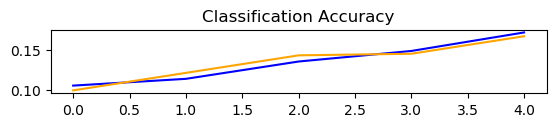

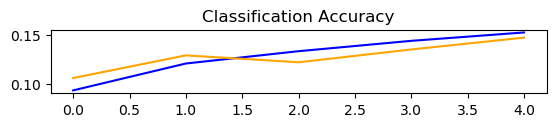

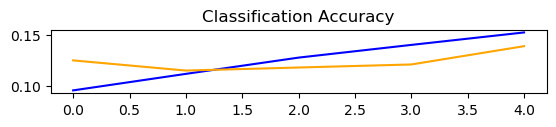

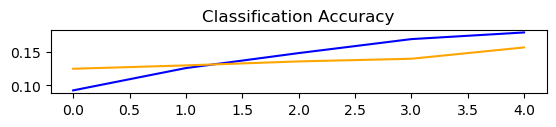

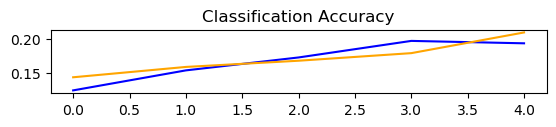

In [42]:
def graficar_resumen(histories):
    for i in range(len(histories)):
        plt.subplot(511)
        plt.title("Classification Accuracy")
        plt.plot(histories[i].history["accuracy"],color="blue",label="train")
        plt.plot(histories[i].history["val_accuracy"],color="orange",label="test")
        plt.show()
        
graficar_resumen(histories=histories)

In [51]:
## contestamos las preguntas de la siguiente parte.

## 1. entrenando un mejor modelo.

def define_model_1():
    model=Sequential()
    #Esto será el primer bloque
    #El primer argumento es el número de filtros. 
    #tamaño del filtro recomendado es de 3x3
    
    #PIMER BLOQUE BLOQUE
    model.add(Conv2D(32,(3,3),strides=2,activation="relu",kernel_initializer="he_uniform",
                padding='same',input_shape=(32,32,3)))

    model.add(AveragePooling2D(2,2))


    #SEGUNDO BLOQUE BLOQUE
    model.add(Conv2D(64,(3,3),strides=1,activation="relu",kernel_initializer="he_uniform",
                padding='same'))

    model.add(AveragePooling2D(2,2))
    
    
    #TERCER BLOQUE BLOQUE
    model.add(Conv2D(128,(3,3),strides=1,activation="relu",kernel_initializer="he_uniform",
                    padding='same'))
    
    
    #AQUI PUEDE IR UN CUARTO BLOQUE
    #....
    
    
    model.add(Flatten())
    model.add(Dense(50,activation="sigmoid",kernel_initializer="he_uniform"))


    model.add(Dense(10,activation="softmax"))
    #Compilamosb
    opt=Adam()
    model.compile(optimizer=opt,loss="categorical_crossentropy",
                 metrics=["accuracy"])
    return model

In [57]:
## almacenamos los resultamos y vemos la comparación entre las medias de acurracy de los dos modelos.
accurracy_1,histories_1 = evaluar_modelo(trainX, trainY,model=define_model_1(),n_folds=5,n_epochs=5)


>45.400
>53.400
>63.300
>74.100
>84.200


In [56]:
import numpy as np
## miramos la comparación del acurracy entre los dos modelos

print(f'El modelo inicial obtuvo un acurracy de: {np.mean(accurracy)}')
print(f'El segundo modelo calibrado obtuvo un acurracy de: {np.mean(accurracy_1)}')

El modelo inicial obtuvo un acurracy de: 0.16380000114440918
El segundo modelo calibrado obtuvo un acurracy de: 0.6283999860286713


In [58]:
## aca vemos que el segundo modelo es claramente mejor incluso teniendo en cuenta que se esta entrenando solo con 5 epochs.

#### 2. Por que da mejor que el modelo feed Forward

Este modelo da mejor que el feed forward porque las redes convolucionales tienen 2 ventajas principales sobre la red feed forward, la primera es que conserva la estructura espacial de las imagenes y la segunda es que, dado los features maps que se extraen en las distintas layers, el modelo puede extraer las caracteristicas de los diferentes tipos de imagenes sin necesidad de que esten ubicados exactamente en los mismos pixeles de la imagen, contrario a el modelo feed forward.

Ademas, para el modelo feed forward es muy dificil diferenciar imagenes en las que los objetos estan en diferentes angulos o posiciones o donde, por ejemplo, los ojos esten cerrados o abiertos. En cambio las convoluciones pueden extraer estas caracteristicas de manera automatica en los feature maps.


# `lec07-Recurrent Neural Network`

**Parte Teórica**
1. ¿Qué es una Red Recurrente?
2. ¿Por qué esta Red es diferente a las que hemos visto antes?
3. ¿Qué problemas hay que solucionar para aplicar este tipo de Red?
4. ¿Qué es LSTM y por qué se dice qué es más "inteligente" que las neuoronas de una Red Feed-Forward?
5. ¿Cuáles fueron las diferentes versiones que vimos de LSTM? Es decir, diferentes configuraciones que hicimos. 


#### 1.
Una red recurrente es una red que permite que los nodos se comuniquen entre ellos en una misma layer, en feed fordward los nodos solo se podian comunicar hacia adelante pasando la información con los pesos. Sin embargo, la red neuronal puede almacenar los resultados de los otros inputs y guardarlos para el siguiente input. A esto se le conoce como una red neuronal con memoria. Es usado por ejemplo para predecir series de tiempo en las que por ejemplo la estacionalidad juega un papel importante o para predecir la siguiente palabra en una secuencia de texto.
#### 2
Esta red es diferente ya que tiene memoria, por lo que, como se menciono anteriormente puede almacenar resultados anteriores de la misma neurona para utilizarlos en pasos adelante. Ademas, estas redes, diferente a las redes feed forward, no necesariamente arrojan una predicción para cada input, puede que para el set completo de inputs, solo arroje un resultado que sea la predicción en t+1 por ejemplo.
#### 3
El principal problema que tienen estas redes es encontrar una metodologia que permita que se guarde la memoria de las redes sin que el gradiente desaparzca o explote. Esto es porque cuando la derivada parcial es muy pequeña, dado que una neurona depende de 6 neuronas atras (por ejemplo), cuando se hace la regla de la cadena 6 veces, el gradiente puede tender a desaparecer. Ahora bien, si se limitan la cantidad de periodos atras en las que puede tener memoria, no cumplirian con el principio de las redes neuronales recurrentes:
- Aceptar secuencias de tamaños variables.
- Rastrear dependendcias de largo plazo.
- mantener información acerca del orden.
- Compartir y propagar los parametros a travez de la secuencia.

#### 4
LSTM significa long short term memory y es una de las metodologias mas famosas y usadas para solucionar el problema de los gradientes que explitan o que se desaparecen. Para solucionar este problema hay bastantes aproximaciones mediante la función de activación, inicialización de los parametros y gated cells (en esta categoria se encuentra LSTM, pero tambien hay otras metodologias como GRU). Esta metodologia lo que permite es que en cada step en el que se va a calcular el parametro de memoria, se selecciona la información del pasado que parece ser importante y se descarta la que no nos interesa, asi se reducen la cantidad de relaciones que la regla de la cadena tiene que tener en cuenta en el gradiente y ademas, se mantiene el principio de que tenga memoria de largo plazo, porque, por ejemplo, la red puee decidir que para predecir las ventas en diciembre, no me importa la información de noviembre, sino la del diciembre pasado.
#### 5
Vimos 3 tipos de lstm, en los que se trata a los lags de la variable, como dos variables independientes y separadas. Luego, en el que se trata como una misma variable pero en la que cada observación tiene su rezago incluido. Por ultimo vimos los modelos en los que se propaga la memoria entre los batches de entrenamiento y por lo tanto y se mantiene si esta memoria ayuda a predecir.

**Parte Práctica**
1. Utilicen el API de yahoo finance y  descarguen el ETF del S&P500 (SPY): 
`data=yf.download("SPY",start="2016-01-01",end="2022-09-10")`

2. De acuerdo a la visto en clase utilicen una Red LSTM. 

3. Definan todo el 2016 hasta el 2021 como su Training Data Set y calibren su modelo.

4. Pronostiquen todo el 2022. 

3. Utilicen `mean_squared_error` para compilar y el Optimizador que deseen. 

4. Utilicen epochs que consideren y que sean online ( batch_size=1)

5. Calculen el RMSE Error Cuadrático Medio del Train y Test

6. Grafiquen su pronóstico en Train y Test.

7. ¿Por qué creen que obtuvieron ese resultado? ¿Cómo lo mejorarían?

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM #NOVEDAD

In [4]:
#tipo de cambio
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf
from datetime import datetime

In [5]:
####################
## PARTE PRACTICA ##
####################
## 1
data=yf.download("SPY",start="2016-01-01",end="2022-09-10")
data=data['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [117]:
## 2
## en los proximos pasos se programara la red neuronal con los pasos que se definen en la parte practica

## definimos tambien el look_back que vamos a hacer
look_back=3

def define_modelRNN():
    model=Sequential()
    model.add(LSTM(8,input_shape=(1,look_back)))
    
    model.add(Dense(1))
    
    model.compile(loss="mean_squared_error",optimizer="adam")
    
    return model
    #le estamos dando las últimas look_back=2 (últimsa dos observaciones) #y que pronostique hoy


In [7]:
# 3 
def create_dataset(data,look_back):
    
    temp=pd.DataFrame(index=data.index)
    
    for i in range (look_back):
        temp[f'data_lag_{i}']=data.shift(i)
    
    temp['data_y']=data.shift(-1)
    return temp.dropna()
    

In [8]:
## primero, escalamos todos los datos
scaler=MinMaxScaler(feature_range=(0,1))
data_1=scaler.fit_transform(pd.DataFrame(data))
data_1=pd.DataFrame(data=data_1,index=data.index).iloc[:,0]

## creamos la tabla con los lags que necesitamos y conservamos las fechas
data_2=create_dataset(pd.Series(np.reshape(data_1,data_1.shape[0])),look_back=3)

## dividimos segun las fechas que necesitemos
TrainX,TestX=data_2[data_2.index<pd.to_datetime('2022-01-01')],data_2[data_2.index>=pd.to_datetime('2022-01-01')]


trainX,testX,trainY,testY=np.array(TrainX.iloc[:,0:-1]),np.array(TestX.iloc[:,0:-1]),np.array(TrainX.iloc[:,-1]),np.array(TestX.iloc[:,-1])

In [150]:
#reshape input sea [samples,time steps,features]
#aquí le estamos dicindo que tiene 2 columnas/features para pronosticas
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [151]:
## fitteamos el modelo y lo predecimos
model=define_modelRNN()
model.fit(trainX,trainY,epochs=25,batch_size=1,verbose=2)

Epoch 1/25
1509/1509 - 4s - loss: 0.0138 - 4s/epoch - 3ms/step
Epoch 2/25
1509/1509 - 2s - loss: 1.8994e-04 - 2s/epoch - 1ms/step
Epoch 3/25
1509/1509 - 2s - loss: 1.8545e-04 - 2s/epoch - 1ms/step
Epoch 4/25
1509/1509 - 2s - loss: 1.9612e-04 - 2s/epoch - 1ms/step
Epoch 5/25
1509/1509 - 2s - loss: 1.9059e-04 - 2s/epoch - 1ms/step
Epoch 6/25
1509/1509 - 2s - loss: 1.8495e-04 - 2s/epoch - 1ms/step
Epoch 7/25
1509/1509 - 2s - loss: 1.7846e-04 - 2s/epoch - 1ms/step
Epoch 8/25
1509/1509 - 2s - loss: 1.8745e-04 - 2s/epoch - 1ms/step
Epoch 9/25
1509/1509 - 2s - loss: 1.8413e-04 - 2s/epoch - 1ms/step
Epoch 10/25
1509/1509 - 2s - loss: 1.7566e-04 - 2s/epoch - 1ms/step
Epoch 11/25
1509/1509 - 2s - loss: 1.7972e-04 - 2s/epoch - 1ms/step
Epoch 12/25
1509/1509 - 2s - loss: 1.7513e-04 - 2s/epoch - 2ms/step
Epoch 13/25
1509/1509 - 3s - loss: 1.7039e-04 - 3s/epoch - 2ms/step
Epoch 14/25
1509/1509 - 2s - loss: 1.6650e-04 - 2s/epoch - 1ms/step
Epoch 15/25
1509/1509 - 3s - loss: 1.7278e-04 - 3s/epoch - 2m

In [152]:
# 4
Predict_2022=model.predict(testX)

6/6 [==============================] - 1s 2ms/step


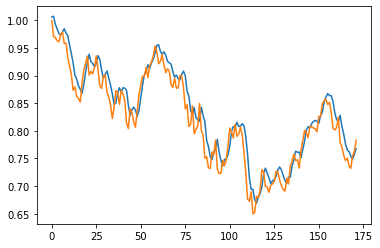

In [158]:
plt.plot(np.reshape(Predict_2022,len(Predict_2022)))
plt.plot(testY)

In [ ]:
## 5

In [164]:
look_back=9
## creamos la tabla con los lags que necesitamos y conservamos las fechas
data_2=create_dataset(pd.Series(np.reshape(data_1,data_1.shape[0])),look_back=3)

## dividimos segun las fechas que necesitemos
TrainX,TestX=data_2[data_2.index<pd.to_datetime('2022-01-01')],data_2[data_2.index>=pd.to_datetime('2022-01-01')]


trainX,testX,trainY,testY=np.array(TrainX.iloc[:,0:-1]),np.array(TestX.iloc[:,0:-1]),np.array(TrainX.iloc[:,-1]),np.array(TestX.iloc[:,-1])

In [165]:
#reshape input sea [samples,time steps,features]
#aquí le estamos dicindo que tiene 2 columnas/features para pronosticas
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [166]:

def define_modelRNN():
    model=Sequential()
    model.add(LSTM(8,input_shape=(1,look_back)))
    
    model.add(Dense(6,activation="sigmoid"))
    
    model.add(Dense(1,activation="sigmoid"))
    
    ## adam suele ser el mejor optimizador por encima de RMSprop
    model.compile(loss="mean_squared_error",optimizer="adam")
    
    return model
    #le estamos dando las últimas look_back=2 (últimsa dos observaciones) #y que pronostique hoy


In [167]:
## 6
model.fit(trainX,trainY,epochs=15,batch_size=1,verbose=2)

Epoch 1/15
1509/1509 - 2s - loss: 1.4553e-04 - 2s/epoch - 1ms/step
Epoch 2/15
1509/1509 - 2s - loss: 1.4371e-04 - 2s/epoch - 1ms/step
Epoch 3/15
1509/1509 - 2s - loss: 1.3720e-04 - 2s/epoch - 1ms/step
Epoch 4/15
1509/1509 - 2s - loss: 1.4621e-04 - 2s/epoch - 1ms/step
Epoch 5/15
1509/1509 - 2s - loss: 1.3783e-04 - 2s/epoch - 1ms/step
Epoch 6/15
1509/1509 - 2s - loss: 1.4240e-04 - 2s/epoch - 1ms/step
Epoch 7/15
1509/1509 - 2s - loss: 1.3740e-04 - 2s/epoch - 1ms/step
Epoch 8/15
1509/1509 - 2s - loss: 1.3580e-04 - 2s/epoch - 1ms/step
Epoch 9/15
1509/1509 - 2s - loss: 1.3774e-04 - 2s/epoch - 1ms/step
Epoch 10/15
1509/1509 - 3s - loss: 1.3249e-04 - 3s/epoch - 2ms/step
Epoch 11/15
1509/1509 - 2s - loss: 1.3190e-04 - 2s/epoch - 1ms/step
Epoch 12/15
1509/1509 - 2s - loss: 1.3366e-04 - 2s/epoch - 2ms/step
Epoch 13/15
1509/1509 - 2s - loss: 1.2873e-04 - 2s/epoch - 2ms/step
Epoch 14/15
1509/1509 - 2s - loss: 1.3244e-04 - 2s/epoch - 2ms/step
Epoch 15/15
1509/1509 - 2s - loss: 1.3363e-04 - 2s/epoch 

In [168]:
Predict_2022=model.predict(testX)

6/6 [==============================] - 0s 2ms/step


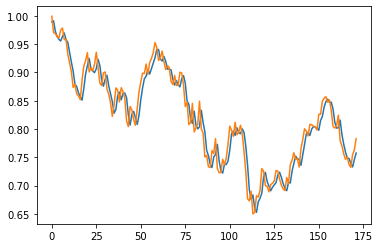

In [169]:
plt.plot(np.reshape(Predict_2022,len(Predict_2022)))
plt.plot(testY)

In [178]:
# 7
## predecimos para el train
train_predict=model.predict(trainX)
#Calculamos Errores
trainScore=math.sqrt(mean_squared_error(trainY,train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore=math.sqrt(mean_squared_error(testY,Predict_2022[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

48/48 [==============================] - 0s 2ms/step
Train Score: 0.01 RMSE
Test Score: 0.02 RMSE


In [179]:
# 8
Y_DataFrame=pd.DataFrame(data=trainY.tolist()+testY.tolist(),index=data_2.index)
X_TrainDF=pd.DataFrame(data=train_predict[:,0],index=TrainX.index)
X_TestDF=pd.DataFrame(data=Predict_2022[:,0],index=TestX.index)

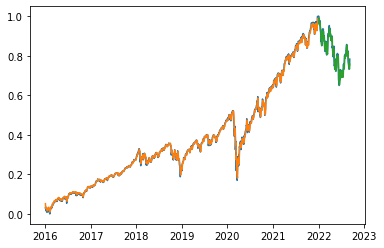

In [183]:
plt.plot(Y_DataFrame.iloc[:,0])
plt.plot(X_TrainDF.iloc[:,0])
plt.plot(X_TestDF.iloc[:,0])

#### 9
Este resultado tan preciso se obtiene ya que estamos utilizando valores que el modelo no va a conocer parapredecir periodos de tiempo adelante. Es decir, el unico error que es robusto en este caso es el de la predicción un dia adelante, de resto, si quisieramos ver el error real tendriamos que usar recursividad para ir reemplazando los valores predichos en los inputs que se van a utilizar para el test en periodos adelante. Adeamas, dado que la Y en este caso es solo la variable un periodo adelante, hay que tener en cuanta que este error se interpreta como: "el promedio de lo que se equivocaria un paso adelante en el futuro". Para mejorar este resultado se deberian calcular los hiperparametros, la cantidad de layers y demas utiliando time series cross validation o backtesting del modelo con el fin de tener una estimación robusta de que tan bien se comporta el modelo fuera de la muestra. Ademas, dentro de los inputs que se le pasan al modelo se le podrian añadir transformaciónes de la variable, como la variable al cuadrado, logaritmica o inputs de este estilo, los cuales a pesar de que la red deberia poder aproximar dentro de las capas, no estan de mas.

Por ultimo, pero no mas importante, se deberia evaluarla posibilidad de agregar memoria entre los batches la cual permitiria que la se transfiera la información entre las series de tiempo y harian que el modelo pudiera converger mas rapido y tal vez de una manera mas precisa.

# `lec08-Reinforcement Learning`

**Parte Teórica**
1. ¿Qué es el modelo de DQN (Deep Q-Network)?
2. ¿Por creen qué lo programamos con `Class`?
3. ¿Qué Reward que usamos en el caso de SPY y en el Caso del Portafolio?
4. ¿Qué es la Q de Bellman?
5. ¿Lo consideran Análisis Supervisado? 
6. ¿Por qué dijomos que las salidas de la Red Neuornal para el caso de SPY era dinero y al mismo tiempo probabilidades?
7. En el caso del portafolio, ¿Qué diferencia le encuentran contra una Optimización Media-Varianza? ¿Por qué creen que estos modelos puden ser bien recibidos para Robo-Advisors, Fondos, etc?
8. ¿Qué papel juega la Gamma y Epsilon?
9. ¿De donde salen los pesos de su portafolio utilizando DQN? 
10. ¿Qué recibe de Input el DQN del Portafolio y por qué?
11. ¿Qué le mejorarían y por qué?

12. Con sus palabras expliquen cómo podríamos usar DQN para un Portafolio de Inversión. ¿En qué se diferencia de Optimización Clásicas Media Varianza (Markowitz)?

#### 1
Un modelo DQN es la extensión de los modelos clasicos de reinforcement learning como SARSA, Q-SARSA y demas, los cuales tienen la misma base conceptual. Estos modelos intentan optimizar las acciones de un "robot" dado un estado especifico, al comprometerse con una acción, dado un estado, deberia obtener un resultado dado Q(S(State),A(Actions)). Ademas, es importante mencionar que para este tipo de modelos siempre es muy importante la exploración, a pesar de que tenga una acción entrenada que es la que le ha dado el mejor resultado dado ese estado, siempre es importante intentar otra acción que tal vez pueda dar un mejor resultado. Estos modelos son muy interesantes porque se entrena un robot que toma las mejores decisiónes en cada estado dadas muchas posibles alternativas de resultados.
#### 2
Se construye con una clase dado que depende de muchas funciones y modulos que interactuan entre si durante el entrenamiento del modelo. Por lo que es importante poder asignarle y modificar valores a un objeto , los cuales no haya que guardar en una lista por ejemplo para modificarlos sino solo llamando al modulo de la clase. Esto es porque reinceforment learning es un proceso meramente iterativo, donde el agente experimenta miles le alternativas para cada estado y observa su recomensa en cada iteración.
#### 3
En este caso utilizamos la perdidas y ganancias del trader automatico. cada una de las acciones podria tener diferentes recomensas, en nuestro caso.
- Vender (perdidas o ganancias de la venta)
- Comprar (no hay recompensa)
- mantener (no hay recompensa)
#### 4
La Q de Bellman es una aproximación que permite dividir el value function en 2 partes, el retorno inmediato y la suma ponderada de todos los retornos en el tiempo. Esto permite que computacionalmente sea mas facil computar la value function porque divide el problema en partes mas simples en vez de sumpar sobre multiples periodos de tiempo.
#### 5
No lo considero analisis supervisado ya que no hay una variable objetivo a la que estemos intentando replicar o predecir, En este caso queremos maximizar una variable que aun no existe (Ganancias). Es decir, en este modelo no esperamos el robot prediga una variable de la mejor manera, sino nuestra objetivo en este caso, es que el robot aprenda una serie de reglas y decisiones dependiendo de la circunstancia en la que se encuentre, para que una vez salga a producción tome las mejores decisiónes. La diferencia por ejemplo con RNN es que en la primera si yo logro predecir la serie a futuro, luego la decisión de como invertir y demas con ese input la tomo yo, sin embargo, DQN ahorra el segundo paso y ya aprende que decisiones debe tomar dado el estado.
#### 6
# esta pendiente
#### 7
La otimización media varianza, a pesar de ser bastante usada, sus pesos dependen en mucha medida de que los retornos y las matrices de covarianza esten bien estimadas y es muy dificil estimarlas de manera correcta, ya que el modelo tiene muy bien desempeño si los estimadores del retorno son lo mas cercanos a los retornos t periodos adelante, lo cual es muuy dificil de predecir. Ademas, estos algoritmos no logran capturar relaciones de largo plazo en el portafolio, es decir, la mejor opción hoy es totalmente independiente de la acción que se tomo la semana pasada, por lo cual pueden no ser muy utiles para hacer estrategias de largo plazo. POr el contrario en el caso de RL, el robot tiene en cuenta todas las decisiónes que se tomaron en el pasado y como estas, dependiendo del estado (el cual se puede hacer tan complejo como se quiera si se tienen suficientes datos), van a calibrar los pesos sin tener la alta sensibilidad a cambios en los retornos de los activos o a correlaciones espurias.
#### 8
Gamma controla que tan importantes son los resultados de largo plazo contra las de corto plazo para el agente, un gamma muy bajo hara que el agente priorice las recompensas inmediatas mientras que un gamma alto hara que priorice la estrategia que da mejores recompensas a largo plazo.
Por otra parte, el epsilon controla la probabilidad con la que el agente va a hacer exploración en cada uno de los estados. Es decir, un agente que no ha revisado todas las acciones dado un estado, puede igual ya tener una acción que maximiza su beneficio de entre las que conoce (diga que conoce 3 posibles acciones de 10 dado ese estado), ya que es riesgoso probar otro estado porque puede tener un resultado peor, esta exploraión se hace con cierta probabilidad para que el modelo siga aprendiendo en todo momento, pero que tampoco aprnenda a costade muchos resultados negativos. El epsilon permite balancear la explotación contra los resultados.
#### 9
Proviene de los valores Q que provee el modelo DQN
#### 10
Le tenemos que definir que va a recibir en el environment y cual va a ser la definición del estado en el que se encuentra el agente dada una acción. Ademas de esto, tambien el tenemos que definir cual va a aser la recompensa que el va a intentar maximizar y como se generan dichas recomensas. La definición de estas 3 cosas son muy importantes porque, sin el environment el agente no entenderia sobre que escenario el se deberia entrenar, sin la definición de los estados, el agente no tendria manera de entender bajo que condiciones, la acción que tomo lo llevo al resultado que obtuvo y, por ultimo y tal vez la mas importante, la definición de la variable que queremos que nuestro agente maximice.
#### 11
Lo primero que se me ocurriria cambiarle a la red en cuanto a la definición seria la definición del estado, ya que yo creo que entre mas información y menos sezgada tenga de estado cuando tomo la decisión le va a ser mas facil encontrar las acciones que maximizan su reward. Por ejemplo, se le podria meter variables como el mes de la serie en ese momento (para controlar estacionalidad), el sharpe ratio de cada activo individual, el PIB desestacionalizado, etc.
#### 12
DQN se podria usar para un portafolio de inversión utilizando como actiones los pesos asignados a cada uno de los componentes del portafolio, lo interesante de este algoritmo es que incluso podria aprender "expertise" que antes se pensaba que solo los humanos podrian tener, ya que el algoritmo, dependiendo de que tan bien se le definan los estados, podria apreder culquier tipo de relación entre las variables del mundo y los retornos de los activos, por lo que, contando con un computador lo suficientemente poderoso y con un set de estados bien definido ademas de muchos datos, se podria entrenar el modelo para que aprenda casi cualquier tipo de relación. Lo unico malo de esto es que el robot no trabaja con ningun tipo de intuición, no hay manera de saber por que esta tomando la deción que toma hoy en dia a pesar de que no parezca optima.
Por otra parte, los modelos de media varianza son muy poderosos porque son relativamente sencillos de estimar y dan una noción de como la diversificación puede ayudar a maximizar nuestros resultados. Sin embargo, a estos modelos es muy dificil incluirle información adicional para que la tenga en cuenta dentro de los pesos, solo se alimenta de los retornos estimados y de las covarizas y son muy sensibles a cambios en estos parametros. La unica aproximación que conozco en donde se le puede añadir nformación adicional a los modelos de media-varianza es Black Litterman pero este depende del analisis experto de la persona que este estimando el portafolio, por lo que no es del todo automatizadoy tiene la influencia de una persona, que puede estar sesgada.

**Parte Práctica Señales Individuales**
1. Utilicen la información del SPY (S&P500) con Train como 2020-2021 y Test como 2022.  
2. Entrenen su modelo con Reinforcement Learning como lo hicimos en clase: 3 señales: compra/mantener/venta. 
3. Grafiquen su modelo como lo hicimos en clase en el train. 
4. En la clase hicimos ejercicio sólo con el Train.  Ahora, una vez que tengan su mejor modelo en el Train (escogen el que mayor utilidad les dé (pueden usar varios episodes/epochs)) prueben ese modelo en el 2022. 
5. Grafiquen su desempeño en el test. ¿Cómo mejorarían su modelo? ¿Por qué obtuvieron ese resultado?

In [189]:
#Reinforcement Learning
import tensorflow
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from collections import namedtuple,deque
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [190]:
#Procsor los datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
import datetime
import math
from numpy.random import choice
import random
import yfinance as yf

In [202]:
data_2

,data_lag_0,data_lag_1,data_lag_2,data_y
Date,,,,
2016-01-06,0.045561,0.052812,0.051841,0.031944
2016-01-07,0.031944,0.045561,0.052812,0.025863
2016-01-08,0.025863,0.031944,0.045561,0.026406
2016-01-11,0.026406,0.025863,0.031944,0.030831
2016-01-12,0.030831,0.026406,0.025863,0.017042
...,...,...,...,...
2022-09-01,0.750403,0.746423,0.756148,0.736986
2022-09-02,0.736986,0.750403,0.746423,0.732236
2022-09-06,0.732236,0.736986,0.750403,0.754768


In [9]:
## 1

## dividimos segun las fechas que necesitemos
TrainX,TestX=data_2[data_2.index<pd.to_datetime('2022-01-01')],data_2[data_2.index>=pd.to_datetime('2022-01-01')]

## YLo convertimos a listas.
TrainX=[float(x) for x in TrainX.iloc[:,0]]
TestX=[float(x) for x in TestX.iloc[:,0]]

In [199]:
## 2

##################################################
## importanto las funciones y clases necesarias ##
##################################################

class Agent: 
    def __init__(self,state_size,is_eval=False,model_name=""):
        self.state_size=state_size #días previos normalizados
        self.action_size=3 #hold,buy,sell
        self.memory=deque(maxlen=1000)
        self.inventory=[]
        self.model_name=model_name
        self.is_eval=is_eval
        self.gamma=0.95
        self.epsilon=1.0
        self.epsilon_min=0.1
        self.epsilon_decay=.995
        self.firtIter=True
        self.model=load("models/"+model_name) if is_eval else self._model()
        

        
    def _model(self):
        model=Sequential()
        model.add(Dense(units=64,input_dim=self.state_size,activation="relu"))
        model.add(Dense(units=32,activation="relu"))
        model.add(Dense(units=8,activation="relu"))
        model.add(Dense(units=8,activation="relu"))
        model.add(Dense(self.action_size,activation="linear"))
        model.compile(loss="mse",optimizer=Adam())
        return model

    def act(self,state):
        rand_val=np.random.rand()
        #El caso cuando todavía no le creo tanto al modelo (explorar)
        if not self.is_eval and rand_val<=self.epsilon:
            #En el rango de 0,1,2, selecciona "uno" de esos
            return random.randrange(self.action_size)

        if (self.firtIter):
            #Si es la pimera iteración, comprar. 
            self.firstIter=False
            return 1 #1 va a ser compra, #2 va a ser venta, #0 mantener
 
    
        #Le voy creyndo más al modelo (explotar)
        options=self.model.predict(state)

        return np.argmax(options[0])

    #El método de Experiencia. Eq. Bellman, Q-value
    def expReplay(self,batch_size):
        mini_batch=[]
        l=len(self.memory)
        #Crear un minibatch accediendo a cada fila de la memoria
        #Ultimas batch_size=10 obsrvacions
        for i in range(l-batch_size+1,l):
            mini_batch.append(self.memory[i])
        #Loop sobre todo nuestro batch
        #Vamos actualizar nuestra Q (reward)
        for state,action,reward,next_state,done in mini_batch:
            target=reward #reward/Q al tiempo t
            #Actualizar el Target de la Tabla (Q)
            if not done: 
                #target=beneficio_hoy + beneficio que esperaría en el futuro
                target=reward+self.gamma* np.amax(self.model.predict(next_state)[0])

            #vamos a ver qué Q-value me pronostican los precios actuales
            target_f=self.model.predict(state)
            #Actualizar el Output de la Tabla para una acción dada
            target_f[0][action]=target

            #Entrenamos y ajustamos
            self.model.fit(state,target_f,epochs=1,verbose=0)

    
        #Implementa lo de la Codicia de qué tanto lo creo al modelo
        if self.epsilon> self.epsilon_min:
            self.epsilon *= self.epsilon_decay

################################################################################################



In [195]:
########################
# funciones auxiliares #
########################

#Funciones Auxiliares
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

def getState(data,t,n):
    #n window_size +1 
    #t el día en el que stamos, vamos iterar por aquí
    d=t-n+1
    block= data[d:t+1] if d>=0 else -d*[data[0]]+data[0:t+1]
    res=[]
    for i in range(n-1):
        res.append(sigmoid(block[i+1]-block[i]))
        return np.array([res])
    
#format de precio
def formatPrice(n):
    return ("-$" if n<0 else "$") + "{0:.2f}".format(abs(n))

In [200]:
agente=Agent(1)

In [196]:
data=TrainX

In [201]:
window_size=1
agent=Agent(window_size)
l=len(data)-1
batch_size=10
states_sell=[]
states_buy=[]
episode_count=0 #epoch


for e in range(episode_count+1):
    print("Episod " + str(e) + "/" + str(episode_count))

    #1.- Nos traemos los precios State/precios
    state=getState(data,0,window_size+1)
    total_profit=0
    agent.inventory=[] #Suponmos Primeras compras primeras salidas
    for t in range(l): #itero sobre días
        #Dame la mejor acción (compra/venta/mantener)
        action=agent.act(state)
        #Mantenmos la posición y obtenemos el precio siguinte
        next_state=getState(data,t+1,window_size+1)
        reward=0
        if action==1: #buy
            agent.inventory.append(data[t])
            states_buy.append(t)
            print("Buy: "+ formatPrice(data[t]))

        elif action==2 and len(agent.inventory)>0: #sell
            bought_price=agent.inventory.pop(0)
            #3 Calculamos el reward de la Venta
            reward=max((data[t]-bought_price),0)
            total_profit+=data[t]-bought_price
            states_sell.append(t)
            print("Sell: " + formatPrice(data[t]) + " ' Profit:'"+ formatPrice(data[t]-bought_price))

        done=True if t==l-1 else False

        #Actualiza la Q de Bellman Next_state
        next_state=getState(data,t+1,window_size+1)
        #Agregar todo a la memoria
        agent.memory.append((state,action,reward,next_state,done))
        state=next_state
        if done:
            print("---")
            print("Total Profil: " + formatPrice(total_profit))
            print("---")
        #Dfinimos cada cuando quermos que actualice el modelo
        if len(agent.memory)>batch_size:
            agent.expReplay(batch_size)
    #Guardamos el modelo
    agent.model.save("models"+str(e))

Episod 0/0
Buy: $0.03
Buy: $0.01
Buy: $0.01
Sell: $0.01 ' Profit:'-$0.01
1/1 [==============================] - 0s 24ms/step
Sell: $0.02 ' Profit:'$0.00
1/1 [==============================] - 0s 27ms/step
Sell: $0.02 ' Profit:'$0.00
1/1 [==============================] - 0s 35ms/step
Buy: $0.02
1/1 [==============================] - 0s 21ms/step
Buy: $0.02
1/1 [==============================] - 0s 24ms/step
Buy: $0.01
1/1 [==============================] - 0s 23ms/step
Buy: $0.01
1/1 [==============================] - 0s 25ms/step
Buy: $0.00
1/1 [==============================] - 0s 24ms/step
Buy: $0.02
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step
Sell: $0.03 ' Profit:'$0.01
1/1 [==============================] - 0s 18ms/step
Sell: $0.03 ' Profit:'$0.00
1/1 [==============================] - 0s 26ms/step
Buy: $0.03
1/1 [==============================] - 0s 39ms/step
Buy: $0.03
1/1 [==============================] - 0s 26ms/step
Buy: $0.04
1/1 [==============================] - 0s 19ms/step
Buy: $0.03
1/1 [==============================] - 0s 22ms/step
Buy: $0.03
1/1 [==============================] - 0s 29ms/step
Sell: $0.04 ' Profit:'$0.04
1/1 [==============================] - 0s 28ms/step
Sell: $0.05 ' Profit:'$0.04
1/1 [==============================] - 0s 26ms/step
Buy: $0.05
1/1 [==============================] - 0s 21ms/step
Buy: $0.05
1/1 [==============================] - 0s 24ms/step
Sell: $0.04 ' Profit:'$0.04
1/1 [==============================] - 0s 28ms/step
Buy: $0.05
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step
Buy: $0.06
1/1 [==============================] - 0s 23ms/step
Sell: $0.06 ' Profit:'$0.04
1/1 [==============================] - 0s 33ms/step
Sell: $0.06 ' Profit:'$0.02
1/1 [==============================] - 0s 23ms/step
Buy: $0.06
1/1 [==============================] - 0s 19ms/step
Buy: $0.06
1/1 [==============================] - 0s 25ms/step
Buy: $0.06
1/1 [==============================] - 0s 20ms/step
Sell: $0.06 ' Profit:'$0.03
1/1 [==============================] - 0s 32ms/step
Buy: $0.06
1/1 [==============================] - 0s 23ms/step
Buy: $0.07
1/1 [==============================] - 0s 23ms/step
Buy: $0.07
1/1 [==============================] - 0s 26ms/step
Buy: $0.07
1/1 [==============================] - 0s 19ms/step
Buy: $0.07
1/1 [==============================] - 0s 24ms/step
Buy: $0.07
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 33ms/step
Sell: $0.07 ' Profit:'$0.03
1/1 [==============================] - 0s 19ms/step
Buy: $0.06
1/1 [==============================] - 0s 22ms/step
Buy: $0.06
1/1 [==============================] - 0s 24ms/step
Buy: $0.07
1/1 [==============================] - 0s 20ms/step
Buy: $0.07
1/1 [==============================] - 0s 32ms/step
Sell: $0.07 ' Profit:'$0.04
1/1 [==============================] - 0s 27ms/step
Buy: $0.08
1/1 [==============================] - 0s 23ms/step
Sell: $0.08 ' Profit:'$0.05
1/1 [==============================] - 0s 19ms/step
Buy: $0.08
1/1 [==============================] - 0s 25ms/step
Buy: $0.08
1/1 [==============================] - 0s 19ms/step
Sell: $0.08 ' Profit:'$0.03
1/1 [==============================] - 0s 31ms/step
Sell: $0.07 ' Profit:'$0.02
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step
Buy: $0.07
1/1 [==============================] - 0s 20ms/step
Sell: $0.07 ' Profit:'$0.02
1/1 [==============================] - 0s 24ms/step
Buy: $0.07
1/1 [==============================] - 0s 27ms/step
Sell: $0.07 ' Profit:'$0.01
1/1 [==============================] - 0s 25ms/step
Sell: $0.07 ' Profit:'$0.01
1/1 [==============================] - 0s 18ms/step
Buy: $0.08
1/1 [==============================] - 0s 22ms/step
Sell: $0.07 ' Profit:'$0.01
1/1 [==============================] - 0s 31ms/step
Sell: $0.07 ' Profit:'$0.00
1/1 [==============================] - 0s 20ms/step
Buy: $0.07
1/1 [==============================] - 0s 25ms/step
Buy: $0.07
1/1 [==============================] - 0s 28ms/step
Sell: $0.07 ' Profit:'$0.00
1/1 [==============================] - 0s 47ms/step
Buy: $0.06
1/1 [==============================] - 0s 21ms/step
Buy: $0.07
1/1 [==============================] - 0s 26ms/step
Sell: $0.07 ' Profit:'$0.01

1/1 [==============================] - 0s 23ms/step
Buy: $0.08
1/1 [==============================] - 0s 18ms/step
Buy: $0.08
1/1 [==============================] - 0s 22ms/step
Buy: $0.08
1/1 [==============================] - 0s 34ms/step
Buy: $0.08
1/1 [==============================] - 0s 33ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 29ms/step
Buy: $0.08
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step
Sell: $0.09 ' Profit:'$0.02
1/1 [==============================] - 0s 19ms/step
Buy: $0.09
1/1 [==============================] - 0s 25ms/step
Sell: $0.09 ' Profit:'$0.01
1/1 [==============================] - 0s 25ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 26ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 20ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 25ms/step
Buy: $0.07
1/1 [==============================] - 0s 27ms/step
Buy: $0.08
1/1 [==============================] - 0s 22ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 22ms/step
Buy: $0.09
1/1 [==============================] - 0s 21ms/step
Buy: $0.06
1/1 [==============================] - 0s 26ms/step
Sell: $0.05 ' Profit:'-$0.02
1/1 [==============================] - 0s 19ms/step
Buy: $0.07
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step
Sell: $0.08 ' Profit:'$0.00
1/1 [==============================] - 0s 26ms/step
Sell: $0.08 ' Profit:'$0.00
1/1 [==============================] - 0s 24ms/step
Sell: $0.08 ' Profit:'$0.01
1/1 [==============================] - 0s 22ms/step
Buy: $0.09
1/1 [==============================] - 0s 24ms/step
Buy: $0.09
1/1 [==============================] - 0s 31ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 25ms/step
Buy: $0.10
1/1 [==============================] - 0s 23ms/step
Buy: $0.10
1/1 [==============================] - 0s 24ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 31ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Buy: $0.10
1/1 [==============================] - 0s 26ms/step
Buy: $0.10
1/1 

1/1 [==============================] - 0s 21ms/step
Sell: $0.10 ' Profit:'$0.03
1/1 [==============================] - 0s 24ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 20ms/step
Sell: $0.10 ' Profit:'$0.03
1/1 [==============================] - 0s 26ms/step
Sell: $0.10 ' Profit:'$0.03
1/1 [==============================] - 0s 26ms/step
Buy: $0.11
1/1 [==============================] - 0s 20ms/step
Buy: $0.11
1/1 [==============================] - 0s 25ms/step
Buy: $0.11
1/1 [==============================] - 0s 25ms/step
Buy: $0.11
1/1 [==============================] - 0s 23ms/step
Buy: $0.11
1/1 [==============================] - 0s 20ms/step
Sell: $0.11 ' Profit:'$0.04
1/1 [==============================] - 0s 22ms/step
Buy: $0.11
1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 21ms/step
Buy: $0.11
1/1 [==============================] - 0s 26ms/step
Buy: $0.11
1/1 [==============================] - 0s 27ms/step
Buy: $0.11
1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 20ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Buy: $0.11
1/1 [==============================] - 0s 23ms/step
Buy: $0.10


1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 25ms/step
Buy: $0.11
1/1 [==============================] - 0s 23ms/step
Buy: $0.11
1/1 [==============================] - 0s 23ms/step
Buy: $0.11
1/1 [==============================] - 0s 21ms/step
Sell: $0.09 ' Profit:'$0.03
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Sell: $0.09 ' Profit:'$0.03
1/1 [==============================] - 0s 24ms/step
Buy: $0.09
1/1 [==============================] - 0s 22ms/step
Sell: $0.10 ' Profit:'$0.03
1/1 [==============================] - 0s 23ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Buy: $0.10
1/1 [==============================] - 0s 28ms/step
Sell: $0.10 ' Profit:'$0.03
1/1 [==============================] - 0s 21ms/step
Buy: $0.11
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 41ms/ste

1/1 [==============================] - 0s 35ms/step
Sell: $0.10 ' Profit:'$0.02
1/1 [==============================] - 0s 25ms/step
Buy: $0.11
1/1 [==============================] - 0s 22ms/step
Buy: $0.10
1/1 [==============================] - 0s 19ms/step
Buy: $0.11
1/1 [==============================] - 0s 22ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Buy: $0.10
1/1 [==============================] - 0s 22ms/step
Buy: $0.10
1/1 [==============================] - 0s 34ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Sell: $0.10 ' Profit:'$0.02
1/1 [==============================] - 0s 22ms/step
Buy: $0.10
1/1 [==============================] - 0s 27ms/step
Buy: $0.10
1/1 [==============================] - 0s 23ms/step
Buy: $0.10
1/1 [==============================] - 0s 22ms/step
Sell: $0.10 ' Profit:'$0.01
1/1 [==============================] - 0s 20ms/step
Sell: $0.10 ' Profit:'$0.01
1/1 [==============================] - 0s 29ms/ste

1/1 [==============================] - 0s 23ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Buy: $0.10
1/1 [==============================] - 0s 25ms/step
Buy: $0.10
1/1 [==============================] - 0s 44ms/step
Buy: $0.10
1/1 [==============================] - 0s 32ms/step
Buy: $0.10
1/1 [==============================] - 0s 21ms/step
Sell: $0.09 ' Profit:'$0.01
1/1 [==============================] - 0s 22ms/step
Buy: $0.09
1/1 [==============================] - 0s 23ms/step
Buy: $0.09
1/1 [==============================] - 0s 22ms/step
Buy: $0.08
1/1 [==============================] - 0s 20ms/step
Buy: $0.08
1/1 [==============================] - 0s 24ms/step
Buy: $0.10
1/1 [==============================] - 0s 23ms/step
Buy: $0.10
1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 24ms/step
Buy: $0.11
1/1 [==============================] - 0s 19ms/step
Buy: $0.11
1/1 [==============================] -

1/1 [==============================] - 0s 25ms/step
Buy: $0.11
1/1 [==============================] - 0s 28ms/step
Sell: $0.11 ' Profit:'$0.04
1/1 [==============================] - 0s 19ms/step
Buy: $0.11
1/1 [==============================] - 0s 24ms/step
Buy: $0.12
1/1 [==============================] - 0s 24ms/step
Buy: $0.12
1/1 [==============================] - 0s 20ms/step
Buy: $0.12
1/1 [==============================] - 0s 20ms/step
Buy: $0.12
1/1 [==============================] - 0s 40ms/step
Buy: $0.12
1/1 [==============================] - 0s 34ms/step
Buy: $0.12
1/1 [==============================] - 0s 29ms/step
Buy: $0.12
1/1 [==============================] - 0s 22ms/step
Buy: $0.11
1/1 [==============================] - 0s 24ms/step
Buy: $0.12
1/1 [==============================] - 0s 22ms/step
Buy: $0.12
1/1 [==============================] - 0s 19ms/step
Buy: $0.13
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step
Buy: $0.13
1/1 [==============================] - 0s 28ms/step
Buy: $0.13
1/1 [==============================] - 0s 24ms/step
Buy: $0.13
1/1 [==============================] - 0s 23ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.14
1/1 [==============================] - 0s 24ms/step
Buy: $0.13
1/1 [==============================] - 0s 23ms/step
Buy: $0.14
1/1 [==============================] - 0s 23ms/step
Buy: $0.14
1/1 [==============================] - 0s 27ms/step
Sell: $0.14 ' Profit:'$0.06
1/1 [==============================] - 0s 26ms/step
Buy: $0.14
1/1 [==============================] - 0s 24ms/step
Buy: $0.14
1/1 [==============================] - 0s 21ms/step
Buy: $0.14
1/1 [==============================] - 0s 21ms/step
Buy: $0.13
1/1 [==============================] - 0s 25ms/step
Buy: $0.13
1/1 [==============================] - 0s 22ms/step
Buy: $0.13
1/1 [==============================] -

1/1 [==============================] - 0s 20ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.14
1/1 [==============================] - 0s 24ms/step
Buy: $0.14
1/1 [==============================] - 0s 19ms/step
Buy: $0.14
1/1 [==============================] - 0s 21ms/step
Buy: $0.14
1/1 [==============================] - 0s 27ms/step
Buy: $0.14
1/1 [==============================] - 0s 23ms/step
Buy: $0.14
1/1 [==============================] - 0s 20ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Sell: $0.14 ' Profit:'$0.05
1/1 [==============================] - 0s 23ms/step
Buy: $0.14
1/1 [==============================] - 0s 22ms/step
Buy: $0.14
1/1 [==============================] - 0s 21ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.15
1/1 [==============================] - 0s 28ms/step
Buy: $0.15
1/1 [==============================] - 0s 24ms/step
Sell: $0.15 ' Profit:'$0.08
1/1 [================

1/1 [==============================] - 0s 24ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.15
1/1 [==============================] - 0s 25ms/step
Buy: $0.15
1/1 [==============================] - 0s 26ms/step
Buy: $0.15
1/1 [==============================] - 0s 26ms/step
Buy: $0.15
1/1 [==============================] - 0s 20ms/step
Buy: $0.15
1/1 [==============================] - 0s 24ms/step
Buy: $0.16
1/1 [==============================] - 0s 24ms/step
Buy: $0.16
1/1 [==============================] - 0s 28ms/step
Buy: $0.16
1/1 [==============================] - 0s 22ms/step
Buy: $0.16
1/1 [==============================] - 0s 23ms/step
Buy: $0.17
1/1 [==============================] - 0s 26ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Sell: $0.17 ' Profit:'$0.09
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 23ms/step
Buy: $0.17
1/1 [==============================] - 0s 20ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 22ms/step
Buy: $0.18
1/1 [==============================] - 0s 24ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 23ms/step
Sell: $0.17 ' Profit:'$0.08
1/1 [==============================] - 0s 23ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 31ms/step
Buy: $0.17
1/1 [==============================] - 0s 34ms/step
Sell: $0.17 ' Profit:'$0.08
1/1 [==============================] - 0s 19ms/step
Buy: $0.17
1/1 [==============================] - 0s 21ms/step
Buy: $0.17
1/1 [==============================] - 0s 24ms/step
Buy: $0.17
1/1 [==============================] - 0s 24ms/step
Buy: $0.17
1/1 [================

1/1 [==============================] - 0s 27ms/step
Buy: $0.16
1/1 [==============================] - 0s 23ms/step
Buy: $0.16
1/1 [==============================] - 0s 20ms/step
Buy: $0.16
1/1 [==============================] - 0s 21ms/step
Buy: $0.16
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 26ms/step
Buy: $0.17
1/1 [==============================] - 0s 19ms/step
Buy: $0.17
1/1 [==============================] - 0s 27ms/step
Buy: $0.17
1/1 [==============================] - 0s 23ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 24ms/step
Buy: $0.17
1/1 [==============================] - 0s 20ms/step
Buy: $0.17
1/1 [==============================] - 0s 22ms/step
Buy: $0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.17
1/1 [==============================] - 0s 28ms/step
Buy: $0.17
1/1 [==============================] - 0s 24ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.16
1/1 [==============================] - 0s 25ms/step
Buy: $0.16
1/1 [==============================] - 0s 29ms/step
Buy: $0.16
1/1 [==============================] - 0s 19ms/step
Buy: $0.17
1/1 [==============================] - 0s 22ms/step
Buy: $0.17
1/1 [==============================] - 0s 27ms/step
Sell: $0.17 ' Profit:'$0.07
1/1 [==============================] - 0s 24ms/step
Buy: $0.18
1/1 [==============================] - 0s 21ms/step
Buy: $0.18
1/1 [==============================] - 0s 20ms/step
Buy: $0.18
1/1 [==============================] - 0s 23ms/step
Buy: $0.18
1/1 [==============================] - 0s 20ms/step
Buy: $0.18
1/1 [==============================] - 0s 20ms/step
Buy: $0.18
1/1 [==============================] - 0s 24ms/step
Buy: $0.18
1/1 [==============================] - 0s 20ms/step
Buy: $0.18
1/1 [==============================] - 0s 19ms/step
Buy: $0.18
1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Buy: $0.18
1/1 [==============================] - 0s 23ms/step
Buy: $0.18
1/1 [==============================] - 0s 19ms/step
Buy: $0.18
1/1 [==============================] - 0s 24ms/step
Buy: $0.18
1/1 [==============================] - 0s 29ms/step
Buy: $0.18
1/1 [==============================] - 0s 21ms/step
Buy: $0.17
1/1 [==============================] - 0s 20ms/step
Buy: $0.17
1/1 [==============================] - 0s 23ms/step
Buy: $0.18
1/1 [==============================] - 0s 19ms/step
Buy: $0.18
1/1 [==============================] - 0s 20ms/step
Buy: $0.18
1/1 [==============================] - 0s 23ms/step
Buy: $0.18
1/1 [==============================] - 0s 21ms/step
Buy: $0.19
1/1 [==============================] - 0s 23ms/step
Buy: $0.19
1/1 [==============================] - 0s 21ms/step
Buy: $0.19
1/1 [==============================] - 0s 25ms/step
Buy: $0.19
1/1 [==============================] - 0s 24ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.19
1/1 [==============================] - 0s 24ms/step
Buy: $0.19
1/1 [==============================] - 0s 19ms/step
Buy: $0.19
1/1 [==============================] - 0s 27ms/step
Buy: $0.19
1/1 [==============================] - 0s 32ms/step
Buy: $0.19
1/1 [==============================] - 0s 38ms/step
Sell: $0.19 ' Profit:'$0.09
1/1 [==============================] - 0s 29ms/step
Sell: $0.19 ' Profit:'$0.09
1/1 [==============================] - 0s 38ms/step
Buy: $0.19
1/1 [==============================] - 0s 44ms/step
Buy: $0.19
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 18ms/step
Buy: $0.19
1/1 [==============================] - 0s 34ms/step
Buy: $0.20
1/1 [==============================] - 0s 34ms/step
Buy: $0.19
1/1 [==============================] - 0s 27ms/step
Buy: $0.19
1/1 [==============================] - 0s 21ms/step
Buy: $0.19
1/1 [==============================] - 0s 19ms/step
Buy: $0.19
1/1 [==============================] - 0s 24ms/step
Buy: $0.19
1/1 [==============================] - 0s 23ms/step
Buy: $0.19
1/1 [==============================] - 0s 21ms/step
Buy: $0.19
1/1 [==============================] - 0s 25ms/step
Buy: $0.19
1/1 [==============================] - 0s 28ms/step
Buy: $0.19
1/1 [==============================] - 0s 26ms/step
Buy: $0.19
1/1 [==============================] - 0s 22ms/step
Buy: $0.19
1/1 [==============================] - 0s 20ms/step
Buy: $0.19
1/1 [==============================] - 0s 22ms/step
Buy: $0.19
1/1 [==============================] - 0s 28ms/step
Buy

1/1 [==============================] - 0s 36ms/step
Buy: $0.20
1/1 [==============================] - 0s 26ms/step
Buy: $0.20
1/1 [==============================] - 0s 22ms/step
Buy: $0.20
1/1 [==============================] - 0s 22ms/step
Buy: $0.20
1/1 [==============================] - 0s 30ms/step
Buy: $0.20
1/1 [==============================] - 0s 25ms/step
Sell: $0.20 ' Profit:'$0.10
1/1 [==============================] - 0s 20ms/step
Buy: $0.21
1/1 [==============================] - 0s 24ms/step
Buy: $0.20
1/1 [==============================] - 0s 21ms/step
Buy: $0.20
1/1 [==============================] - 0s 23ms/step
Buy: $0.21
1/1 [==============================] - 0s 23ms/step
Buy: $0.21
1/1 [==============================] - 0s 21ms/step
Buy: $0.21
1/1 [==============================] - 0s 24ms/step
Buy: $0.20
1/1 [==============================] - 0s 27ms/step
Buy: $0.21
1/1 [==============================] - 0s 31ms/step
Buy: $0.21
1/1 [==============================] -

1/1 [==============================] - 0s 20ms/step
Buy: $0.21
1/1 [==============================] - 0s 25ms/step
Buy: $0.21
1/1 [==============================] - 0s 30ms/step
Buy: $0.21
1/1 [==============================] - 0s 29ms/step
Buy: $0.20
1/1 [==============================] - 0s 24ms/step
Buy: $0.20
1/1 [==============================] - 0s 23ms/step
Buy: $0.20
1/1 [==============================] - 0s 26ms/step
Buy: $0.20
1/1 [==============================] - 0s 25ms/step
Buy: $0.20
1/1 [==============================] - 0s 24ms/step
Buy: $0.19
1/1 [==============================] - 0s 21ms/step
Sell: $0.19 ' Profit:'$0.09
1/1 [==============================] - 0s 25ms/step
Buy: $0.19
1/1 [==============================] - 0s 32ms/step
Buy: $0.20
1/1 [==============================] - 0s 25ms/step
Buy: $0.20
1/1 [==============================] - 0s 21ms/step
Buy: $0.20
1/1 [==============================] - 0s 20ms/step
Buy: $0.20
1/1 [==============================] -

1/1 [==============================] - 0s 23ms/step
Buy: $0.20
1/1 [==============================] - 0s 19ms/step
Buy: $0.20
1/1 [==============================] - 0s 27ms/step
Buy: $0.21
1/1 [==============================] - 0s 31ms/step
Buy: $0.21
1/1 [==============================] - 0s 23ms/step
Buy: $0.20
1/1 [==============================] - 0s 23ms/step
Buy: $0.20
1/1 [==============================] - 0s 19ms/step
Buy: $0.20
1/1 [==============================] - 0s 25ms/step
Buy: $0.20
1/1 [==============================] - 0s 26ms/step
Buy: $0.21
1/1 [==============================] - 0s 22ms/step
Buy: $0.21
1/1 [==============================] - 0s 23ms/step
Buy: $0.21
1/1 [==============================] - 0s 26ms/step
Buy: $0.21
1/1 [==============================] - 0s 23ms/step
Buy: $0.22
1/1 [==============================] - 0s 19ms/step
Buy: $0.22
1/1 [==============================] - 0s 23ms/step
Buy: $0.22
1/1 [==============================] - 0s 25ms/step
Buy

1/1 [==============================] - 0s 25ms/step
Buy: $0.21
1/1 [==============================] - 0s 22ms/step
Buy: $0.21
1/1 [==============================] - 0s 23ms/step
Buy: $0.22
1/1 [==============================] - 0s 24ms/step
Sell: $0.22 ' Profit:'$0.12
1/1 [==============================] - 0s 21ms/step
Buy: $0.22
1/1 [==============================] - 0s 19ms/step
Buy: $0.22
1/1 [==============================] - 0s 23ms/step
Buy: $0.23
1/1 [==============================] - 0s 24ms/step
Buy: $0.23
1/1 [==============================] - 0s 23ms/step
Buy: $0.23
1/1 [==============================] - 0s 22ms/step
Buy: $0.23
1/1 [==============================] - 0s 27ms/step
Buy: $0.23
1/1 [==============================] - 0s 23ms/step
Buy: $0.23
1/1 [==============================] - 0s 22ms/step
Buy: $0.23
1/1 [==============================] - 0s 19ms/step
Buy: $0.23
1/1 [==============================] - 0s 22ms/step
Buy: $0.23
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step
Buy: $0.23
1/1 [==============================] - 0s 24ms/step
Sell: $0.24 ' Profit:'$0.13
1/1 [==============================] - 0s 25ms/step
Buy: $0.24
1/1 [==============================] - 0s 19ms/step
Buy: $0.24
1/1 [==============================] - 0s 23ms/step
Buy: $0.23
1/1 [==============================] - 0s 23ms/step
Buy: $0.23
1/1 [==============================] - 0s 29ms/step
Buy: $0.24
1/1 [==============================] - 0s 23ms/step
Buy: $0.24
1/1 [==============================] - 0s 18ms/step
Buy: $0.24
1/1 [==============================] - 0s 25ms/step
Buy: $0.24
1/1 [==============================] - 0s 24ms/step
Buy: $0.24
1/1 [==============================] - 0s 19ms/step
Buy: $0.24
1/1 [==============================] - 0s 22ms/step
Buy: $0.24
1/1 [==============================] - 0s 29ms/step
Buy: $0.24
1/1 [==============================] - 0s 28ms/step
Buy: $0.24
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step
Buy: $0.24
1/1 [==============================] - 0s 21ms/step
Buy: $0.24
1/1 [==============================] - 0s 23ms/step
Buy: $0.24
1/1 [==============================] - 0s 22ms/step
Buy: $0.24
1/1 [==============================] - 0s 20ms/step
Buy: $0.24
1/1 [==============================] - 0s 27ms/step
Buy: $0.24
1/1 [==============================] - 0s 29ms/step
Buy: $0.24
1/1 [==============================] - 0s 22ms/step
Sell: $0.25 ' Profit:'$0.14
1/1 [==============================] - 0s 20ms/step
Buy: $0.25
1/1 [==============================] - 0s 22ms/step
Buy: $0.25
1/1 [==============================] - 0s 30ms/step
Buy: $0.25
1/1 [==============================] - 0s 21ms/step
Buy: $0.26
1/1 [==============================] - 0s 20ms/step
Buy: $0.25
1/1 [==============================] - 0s 29ms/step
Buy: $0.26
1/1 [==============================] - 0s 28ms/step
Buy: $0.26
1/1 [==============================] -

1/1 [==============================] - 0s 19ms/step
Buy: $0.26
1/1 [==============================] - 0s 28ms/step
Buy: $0.26
1/1 [==============================] - 0s 25ms/step
Buy: $0.26
1/1 [==============================] - 0s 28ms/step
Buy: $0.27
1/1 [==============================] - 0s 27ms/step
Buy: $0.27
1/1 [==============================] - 0s 19ms/step
Buy: $0.27
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 22ms/step
Buy: $0.27
1/1 [==============================] - 0s 23ms/step
Buy: $0.28
1/1 [==============================] - 0s 30ms/step
Buy: $0.27
1/1 [==============================] - 0s 26ms/step
Buy: $0.27
1/1 [==============================] - 0s 49ms/step
Buy: $0.27
1/1 [==============================] - 0s 48ms/step
Buy: $0.27
1/1 [==============================] - 0s 27ms/step
Buy: $0.27
1/1 [==============================] - 0s 33ms/step
Buy: $0.27
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 26ms/step
Buy: $0.28
1/1 [==============================] - 0s 25ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 20ms/step
Buy: $0.29
1/1 [==============================] - 0s 25ms/step
Buy: $0.29
1/1 [==============================] - 0s 28ms/step
Buy: $0.29
1/1 [==============================] - 0s 28ms/step
Buy: $0.30
1/1 [==============================] - 0s 26ms/step
Buy: $0.30
1/1 [==============================] - 0s 20ms/step
Buy: $0.30
1/1 [==============================] - 0s 21ms/step
Buy: $0.31
1/1 [==============================] - 0s 23ms/step
Buy: $0.31
1/1 [==============================] - 0s 26ms/step
Buy: $0.31
1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.32
1/1 [==============================] - 0s 26ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 19ms/step
Buy: $0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.32
1/1 [==============================] - 0s 24ms/step
Buy: $0.32
1/1 [==============================] - 0s 27ms/step
Buy: $0.30
1/1 [==============================] - 0s 24ms/step
Buy: $0.26
1/1 [==============================] - 0s 19ms/step
Buy: $0.28
1/1 [==============================] - 0s 22ms/step
Buy: $0.27
1/1 [==============================] - 0s 23ms/step
Buy: $0.24
1/1 [==============================] - 0s 25ms/step
Buy: $0.26
1/1 [==============================] - 0s 20ms/step
Buy: $0.27
1/1 [==============================] - 0s 28ms/step
Buy: $0.27
1/1 [==============================] - 0s 33ms/step
Buy: $0.28
1/1 [==============================] - 0s 27ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 28ms/step
Buy

1/1 [==============================] - 0s 22ms/step
Buy: $0.28
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 28ms/step
Buy: $0.30
1/1 [==============================] - 0s 23ms/step
Buy: $0.29
1/1 [==============================] - 0s 21ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Sell: $0.27 ' Profit:'$0.17
1/1 [==============================] - 0s 25ms/step
Buy: $0.28
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 22ms/step
Buy: $0.29
1/1 [==============================] - 0s 33ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.31
1/1 [==============================] - 0s 27ms/step
Buy: $0.31
1/1 [==============================] - 0s 23ms/step
Buy: $0.30
1/1 [==============================] - 0s 21ms/step
Buy: $0.30
1/1 [==============================] -

1/1 [==============================] - 0s 54ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 21ms/step
Buy: $0.26
1/1 [==============================] - 0s 22ms/step
Sell: $0.25 ' Profit:'$0.14
1/1 [==============================] - 0s 25ms/step
Buy: $0.27
1/1 [==============================] - 0s 24ms/step
Buy: $0.26
1/1 [==============================] - 0s 33ms/step
Buy: $0.25
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 20ms/step
Buy: $0.25
1/1 [==============================] - 0s 28ms/step
Buy: $0.26
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 27ms/step
Buy: $0.27
1/1 [==============================] - 0s 22ms/step
Buy: $0.25
1/1 [==============================] - 0s 26ms/step
Buy: $0.26
1/1 [==============================] -

1/1 [==============================] - 0s 23ms/step
Buy: $0.27
1/1 [==============================] - 0s 22ms/step
Buy: $0.28
1/1 [==============================] - 0s 20ms/step
Buy: $0.28
1/1 [==============================] - 0s 32ms/step
Buy: $0.28
1/1 [==============================] - 0s 27ms/step
Buy: $0.28
1/1 [==============================] - 0s 30ms/step
Buy: $0.27
1/1 [==============================] - 0s 21ms/step
Buy: $0.27
1/1 [==============================] - 0s 22ms/step
Buy: $0.26
1/1 [==============================] - 0s 24ms/step
Buy: $0.26
1/1 [==============================] - 0s 27ms/step
Buy: $0.27
1/1 [==============================] - 0s 19ms/step
Buy: $0.27
1/1 [==============================] - 0s 34ms/step
Buy: $0.27
1/1 [==============================] - 0s 20ms/step
Buy: $0.27
1/1 [==============================] - 0s 21ms/step
Sell: $0.26 ' Profit:'$0.16
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] -

1/1 [==============================] - 0s 22ms/step
Buy: $0.27
1/1 [==============================] - 0s 27ms/step
Sell: $0.28 ' Profit:'$0.18
1/1 [==============================] - 0s 23ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 21ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 36ms/step
Buy: $0.29
1/1 [==============================] - 0s 26ms/step
Buy: $0.29
1/1 [==============================] - 0s 18ms/step
Buy: $0.29
1/1 [==============================] - 0s 23ms/step
Buy: $0.29
1/1 [==============================] - 0s 23ms/step
Buy: $0.29
1/1 [==============================] - 0s 23ms/step
Buy: $0.29
1/1 [==============================] - 0s 19ms/step
Buy: $0.28
1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 18ms/step
Buy: $0.30
1/1 [==============================] - 0s 23ms/step
Buy: $0.31
1/1 [==============================] - 0s 21ms/step
Buy: $0.31
1/1 [==============================] - 0s 19ms/step
Buy: $0.31
1/1 [==============================] - 0s 27ms/step
Buy: $0.31
1/1 [==============================] - 0s 29ms/step
Buy: $0.31
1/1 [==============================] - 0s 34ms/step
Buy: $0.31
1/1 [==============================] - 0s 30ms/step
Buy: $0.31
1/1 [==============================] - 0s 28ms/step
Buy: $0.31
1/1 [==============================] - 0s 29ms/step
Buy: $0.31
1/1 [==============================] - 0s 22ms/step
Buy: $0.30
1/1 [==============================] - 0s 28ms/step
Buy: $0.31
1/1 [==============================] - 0s 29ms/step
Buy: $0.30
1/1 [==============================] - 0s 22ms/step
Buy: $0.30
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 29ms/step
Buy: $0.29
1/1 [==============================] - 0s 27ms/step
Buy: $0.29
1/1 [==============================] - 0s 25ms/step
Buy: $0.29
1/1 [==============================] - 0s 25ms/step
Buy: $0.29
1/1 [==============================] - 0s 21ms/step
Buy: $0.29
1/1 [==============================] - 0s 22ms/step
Buy: $0.29
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 24ms/step
Buy: $0.30
1/1 [==============================] - 0s 22ms/step
Buy: $0.31
1/1 [==============================] - 0s 19ms/step
Buy: $0.31
1/1 [==============================] - 0s 31ms/step
Buy: $0.31
1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 21ms/step
Buy: $0.32
1/1 [==============================] - 0s 36ms/step
Buy: $0.32
1/1 [==============================] - 0s 26ms/step
Buy: $0.32
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 38ms/step
Buy: $0.32
1/1 [==============================] - 0s 33ms/step
Buy: $0.32
1/1 [==============================] - 0s 25ms/step
Buy: $0.32
1/1 [==============================] - 0s 21ms/step
Buy: $0.33
1/1 [==============================] - 0s 22ms/step
Buy: $0.33
1/1 [==============================] - 0s 32ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 26ms/step
Buy: $0.32
1/1 [==============================] - 0s 20ms/step
Buy: $0.32
1/1 [==============================] - 0s 21ms/step
Buy: $0.33
1/1 [==============================] - 0s 26ms/step
Buy: $0.33
1/1 [==============================] - 0s 29ms/step
Buy: $0.33
1/1 [==============================] - 0s 24ms/step
Buy: $0.33
1/1 [==============================] - 0s 19ms/step
Buy: $0.33
1/1 [==============================] - 0s 23ms/step
Buy

1/1 [==============================] - 0s 21ms/step
Buy: $0.32
1/1 [==============================] - 0s 20ms/step
Buy: $0.33
1/1 [==============================] - 0s 23ms/step
Buy: $0.33
1/1 [==============================] - 0s 22ms/step
Buy: $0.33
1/1 [==============================] - 0s 20ms/step
Buy: $0.34
1/1 [==============================] - 0s 26ms/step
Buy: $0.34
1/1 [==============================] - 0s 25ms/step
Buy: $0.33
1/1 [==============================] - 0s 18ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.35
1/1 [==============================] - 0s 25ms/step
Buy: $0.35
1/1 [==============================] - 0s 21ms/step
Buy: $0.35
1/1 [==============================] - 0s 21ms/step
Buy: $0.35
1/1 [==============================] - 0s 28ms/step
Buy: $0.35
1/1 [==============================] - 0s 25ms/step
Buy: $0.34
1/1 [==============================] - 0s 25ms/step
Buy: $0.34
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 28ms/step
Buy: $0.34
1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 19ms/step
Buy: $0.35
1/1 [==============================] - 0s 32ms/step
Buy: $0.35
1/1 [==============================] - 0s 22ms/step
Buy: $0.35
1/1 [==============================] - 0s 21ms/step
Buy: $0.35
1/1 [==============================] - 0s 20ms/step
Buy: $0.36
1/1 [==============================] - 0s 24ms/step
Buy: $0.36
1/1 [==============================] - 0s 24ms/step
Buy: $0.35
1/1 [==============================] - 0s 26ms/step
Buy: $0.35
1/1 [==============================] - 0s 34ms/step
Buy: $0.35
1/1 [==============================] - 0s 18ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 18ms/step
Buy

1/1 [==============================] - 0s 27ms/step
Buy: $0.35
1/1 [==============================] - 0s 30ms/step
Buy: $0.34
1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 21ms/step
Buy: $0.34
1/1 [==============================] - 0s 22ms/step
Buy: $0.32
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 23ms/step
Buy: $0.31
1/1 [==============================] - 0s 27ms/step
Buy: $0.30
1/1 [==============================] - 0s 30ms/step
Buy: $0.32
1/1 [==============================] - 0s 29ms/step
Buy: $0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.31
1/1 [==============================] - 0s 24ms/step
Buy: $0.31
1/1 [==============================] - 0s 22ms/step
Buy: $0.31
1/1 [==============================] - 0s 23ms/step
Buy: $0.30
1/1 [==============================] - 0s 20ms/step
Buy: $0.28
1/1 [==============================] - 0s 25ms/step
Buy

1/1 [==============================] - 0s 31ms/step
Buy: $0.28
1/1 [==============================] - 0s 24ms/step
Buy: $0.27
1/1 [==============================] - 0s 19ms/step
Buy: $0.28
1/1 [==============================] - 0s 22ms/step
Buy: $0.29
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 19ms/step
Buy: $0.30
1/1 [==============================] - 0s 27ms/step
Buy: $0.31
1/1 [==============================] - 0s 22ms/step
Buy: $0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.32
1/1 [==============================] - 0s 24ms/step
Buy: $0.31
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 22ms/step
Buy: $0.30
1/1 [==============================] - 0s 25ms/step
Buy: $0.29
1/1 [==============================] - 0s 23ms/step
Buy: $0.30
1/1 [==============================] - 0s 27ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.28
1/1 [==============================] - 0s 24ms/step
Buy: $0.27
1/1 [==============================] - 0s 21ms/step
Buy: $0.28
1/1 [==============================] - 0s 32ms/step
Buy: $0.30
1/1 [==============================] - 0s 30ms/step
Buy: $0.30
1/1 [==============================] - 0s 26ms/step
Buy: $0.31
1/1 [==============================] - 0s 29ms/step
Buy: $0.32
1/1 [==============================] - 0s 21ms/step
Buy: $0.29
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 23ms/step
Buy: $0.27
1/1 [==============================] - 0s 26ms/step
Buy: $0.27
1/1 [==============================] - 0s 28ms/step
Buy: $0.27
1/1 [==============================] - 0s 21ms/step
Buy: $0.28
1/1 [==============================] - 0s 21ms/step
Buy: $0.28
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 22ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.25
1/1 [==============================] - 0s 28ms/step
Sell: $0.22 ' Profit:'$0.11
1/1 [==============================] - 0s 27ms/step
Buy: $0.21
1/1 [==============================] - 0s 24ms/step
Buy: $0.19
1/1 [==============================] - 0s 22ms/step
Buy: $0.22
1/1 [==============================] - 0s 16ms/step
Sell: $0.23 ' Profit:'$0.12
1/1 [==============================] - 0s 25ms/step
Buy: $0.24
1/1 [==============================] - 0s 33ms/step
Buy: $0.24
1/1 [==============================] - 0s 30ms/step
Buy: $0.22
1/1 [==============================] - 0s 20ms/step
Buy: $0.24
1/1 [==============================] - 0s 24ms/step
Buy: $0.25
1/1 [==============================] - 0s 28ms/step
Buy: $0.26
1/1 [==============================] - 0s 27ms/step
Buy: $0.26
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 26ms/step
Buy: $0.26
1/1 [================

1/1 [==============================] - 0s 29ms/step
Buy: $0.26
1/1 [==============================] - 0s 22ms/step
Buy: $0.27
1/1 [==============================] - 0s 24ms/step
Buy: $0.27
1/1 [==============================] - 0s 35ms/step
Buy: $0.27
1/1 [==============================] - 0s 20ms/step
Buy: $0.29
1/1 [==============================] - 0s 19ms/step
Buy: $0.27
1/1 [==============================] - 0s 25ms/step
Buy: $0.28
1/1 [==============================] - 0s 30ms/step
Sell: $0.28 ' Profit:'$0.17
1/1 [==============================] - 0s 31ms/step
Buy: $0.28
1/1 [==============================] - 0s 29ms/step
Buy: $0.28
1/1 [==============================] - 0s 25ms/step
Buy: $0.28
1/1 [==============================] - 0s 19ms/step
Buy: $0.29
1/1 [==============================] - 0s 21ms/step
Buy: $0.30
1/1 [==============================] - 0s 27ms/step
Buy: $0.30
1/1 [==============================] - 0s 30ms/step
Buy: $0.30
1/1 [==============================] -

1/1 [==============================] - 0s 19ms/step
Buy: $0.30
1/1 [==============================] - 0s 23ms/step
Buy: $0.30
1/1 [==============================] - 0s 25ms/step
Buy: $0.30
1/1 [==============================] - 0s 25ms/step
Sell: $0.31 ' Profit:'$0.20
1/1 [==============================] - 0s 22ms/step
Buy: $0.31
1/1 [==============================] - 0s 25ms/step
Buy: $0.31
1/1 [==============================] - 0s 25ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy: $0.32
1/1 [==============================] - 0s 21ms/step
Buy: $0.32
1/1 [==============================] - 0s 19ms/step
Buy: $0.32
1/1 [==============================] - 0s 27ms/step
Buy: $0.32
1/1 [==============================] - 0s 27ms/step
Buy: $0.32
1/1 [==============================] - 0s 28ms/step
Buy: $0.32
1/1 [==============================] - 0s 20ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy: $0.33
1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Buy: $0.32
1/1 [==============================] - 0s 25ms/step
Buy: $0.31
1/1 [==============================] - 0s 31ms/step
Buy: $0.31
1/1 [==============================] - 0s 29ms/step
Buy: $0.32
1/1 [==============================] - 0s 19ms/step
Buy: $0.32
1/1 [==============================] - 0s 20ms/step
Buy: $0.33
1/1 [==============================] - 0s 25ms/step
Buy: $0.33
1/1 [==============================] - 0s 23ms/step
Buy: $0.33
1/1 [==============================] - 0s 21ms/step
Buy: $0.34
1/1 [==============================] - 0s 27ms/step
Buy: $0.34
1/1 [==============================] - 0s 27ms/step
Buy: $0.33
1/1 [==============================] - 0s 22ms/step
Buy: $0.34
1/1 [==============================] - 0s 19ms/step
Buy: $0.33
1/1 [==============================] - 0s 24ms/step
Buy: $0.33
1/1 [==============================] - 0s 25ms/step
Buy: $0.33
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.34
1/1 [==============================] - 0s 34ms/step
Buy: $0.35
1/1 [==============================] - 0s 25ms/step
Buy: $0.35
1/1 [==============================] - 0s 20ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 25ms/step
Buy: $0.36
1/1 [==============================] - 0s 18ms/step
Buy: $0.35
1/1 [==============================] - 0s 32ms/step
Buy: $0.36
1/1 [==============================] - 0s 27ms/step
Sell: $0.35 ' Profit:'$0.25
1/1 [==============================] - 0s 25ms/step
Buy: $0.36
1/1 [==============================] - 0s 21ms/step
Buy: $0.36
1/1 [==============================] - 0s 20ms/step
Buy: $0.36
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 27ms/step
Buy: $0.36
1/1 [==============================] -

1/1 [==============================] - 0s 25ms/step
Buy: $0.37
1/1 [==============================] - 0s 21ms/step
Buy: $0.37
1/1 [==============================] - 0s 29ms/step
Buy: $0.37
1/1 [==============================] - 0s 24ms/step
Buy: $0.37
1/1 [==============================] - 0s 22ms/step
Buy: $0.37
1/1 [==============================] - 0s 19ms/step
Buy: $0.37
1/1 [==============================] - 0s 30ms/step
Sell: $0.36 ' Profit:'$0.26
1/1 [==============================] - 0s 36ms/step
Buy: $0.37
1/1 [==============================] - 0s 22ms/step
Buy: $0.37
1/1 [==============================] - 0s 31ms/step
Buy: $0.35
1/1 [==============================] - 0s 21ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.35
1/1 [==============================] - 0s 27ms/step
Buy: $0.35
1/1 [==============================] - 0s 36ms/step
Buy: $0.33
1/1 [==============================] - 0s 30ms/step
Buy: $0.34
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 22ms/step
Buy: $0.35
1/1 [==============================] - 0s 19ms/step
Buy: $0.35
1/1 [==============================] - 0s 33ms/step
Buy: $0.34
1/1 [==============================] - 0s 21ms/step
Buy: $0.34
1/1 [==============================] - 0s 23ms/step
Buy: $0.33
1/1 [==============================] - 0s 25ms/step
Buy: $0.32
1/1 [==============================] - 0s 24ms/step
Buy: $0.33
1/1 [==============================] - 0s 20ms/step
Buy: $0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.31
1/1 [==============================] - 0s 32ms/step
Buy: $0.33
1/1 [==============================] - 0s 31ms/step
Buy: $0.34
1/1 [==============================] - 0s 24ms/step
Buy: $0.34
1/1 [==============================] - 0s 19ms/step
Buy: $0.35
1/1 [==============================] - 0s 21ms/step
Buy

1/1 [==============================] - 0s 35ms/step
Buy: $0.36
1/1 [==============================] - 0s 34ms/step
Buy: $0.36
1/1 [==============================] - 0s 24ms/step
Buy: $0.36
1/1 [==============================] - 0s 36ms/step
Buy: $0.37
1/1 [==============================] - 0s 30ms/step
Buy: $0.38
1/1 [==============================] - 0s 25ms/step
Buy: $0.38
1/1 [==============================] - 0s 24ms/step
Buy: $0.38
1/1 [==============================] - 0s 22ms/step
Buy: $0.37
1/1 [==============================] - 0s 26ms/step
Buy: $0.37
1/1 [==============================] - 0s 23ms/step
Buy: $0.37
1/1 [==============================] - 0s 23ms/step
Sell: $0.37 ' Profit:'$0.26
1/1 [==============================] - 0s 26ms/step
Buy: $0.38
1/1 [==============================] - 0s 24ms/step
Buy: $0.38
1/1 [==============================] - 0s 33ms/step
Buy: $0.39
1/1 [==============================] - 0s 34ms/step
Buy: $0.39
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step
Buy: $0.39
1/1 [==============================] - 0s 24ms/step
Buy: $0.39
1/1 [==============================] - 0s 23ms/step
Buy: $0.39
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 30ms/step
Buy: $0.40
1/1 [==============================] - 0s 30ms/step
Buy: $0.39
1/1 [==============================] - 0s 19ms/step
Buy: $0.39
1/1 [==============================] - 0s 26ms/step
Buy: $0.39
1/1 [==============================] - 0s 25ms/step
Buy: $0.39
1/1 [==============================] - 0s 23ms/step
Buy: $0.39
1/1 [==============================] - 0s 21ms/step
Buy: $0.40
1/1 [==============================] - 0s 34ms/step
Buy: $0.40
1/1 [==============================] - 0s 36ms/step
Buy: $0.40
1/1 [==============================] - 0s 26ms/step
Buy: $0.40
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 21ms/step
Buy

1/1 [==============================] - 0s 30ms/step
Buy: $0.38
1/1 [==============================] - 0s 26ms/step
Sell: $0.37 ' Profit:'$0.27
1/1 [==============================] - 0s 31ms/step
Buy: $0.35
1/1 [==============================] - 0s 24ms/step
Buy: $0.36
1/1 [==============================] - 0s 22ms/step
Buy: $0.36
1/1 [==============================] - 0s 22ms/step
Sell: $0.38 ' Profit:'$0.27
1/1 [==============================] - 0s 23ms/step
Buy: $0.37
1/1 [==============================] - 0s 25ms/step
Buy: $0.36
1/1 [==============================] - 0s 27ms/step
Buy: $0.37


1/1 [==============================] - 0s 27ms/step
Buy: $0.35
1/1 [==============================] - 0s 20ms/step
Buy: $0.35
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 24ms/step
Buy: $0.37
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 19ms/step
Buy: $0.37
1/1 [==============================] - 0s 23ms/step
Sell: $0.37 ' Profit:'$0.27
1/1 [==============================] - 0s 30ms/step
Buy: $0.35
1/1 [==============================] - 0s 32ms/step
Buy: $0.36
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 24ms/step
Buy: $0.36
1/1 [==============================] - 0s 19ms/step
Buy: $0.37
1/1 [==============================] - 0s 22ms/step
Buy: $0.37
1/1 [==============================] - 0s 21ms/step
Buy: $0.37
1/1 [==============================] - 0s 19ms/step
Sell: $0.38 ' Profit:'$0.27
1/1 [================

1/1 [==============================] - 0s 26ms/step
Buy: $0.39
1/1 [==============================] - 0s 25ms/step
Buy: $0.39
1/1 [==============================] - 0s 19ms/step
Buy: $0.40
1/1 [==============================] - 0s 21ms/step
Buy: $0.40
1/1 [==============================] - 0s 27ms/step
Buy: $0.40
1/1 [==============================] - 0s 29ms/step
Buy: $0.40
1/1 [==============================] - 0s 41ms/step
Buy: $0.40
1/1 [==============================] - 0s 22ms/step
Buy: $0.40
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 22ms/step
Buy: $0.39
1/1 [==============================] - 0s 24ms/step
Buy: $0.39
1/1 [==============================] - 0s 24ms/step
Buy: $0.39
1/1 [==============================] - 0s 22ms/step
Buy: $0.39
1/1 [==============================] - 0s 25ms/step
Buy: $0.39
1/1 [==============================] - 0s 22ms/step
Buy: $0.39
1/1 [==============================] - 0s 24ms/step
Buy

1/1 [==============================] - 0s 21ms/step
Buy: $0.36
1/1 [==============================] - 0s 21ms/step
Buy: $0.37
1/1 [==============================] - 0s 26ms/step
Buy: $0.38
1/1 [==============================] - 0s 34ms/step
Buy: $0.38
1/1 [==============================] - 0s 29ms/step
Buy: $0.36
1/1 [==============================] - 0s 19ms/step
Buy: $0.37
1/1 [==============================] - 0s 24ms/step
Buy: $0.38
1/1 [==============================] - 0s 22ms/step
Buy: $0.39
1/1 [==============================] - 0s 18ms/step
Buy: $0.39
1/1 [==============================] - 0s 21ms/step
Buy: $0.40
1/1 [==============================] - 0s 23ms/step
Buy: $0.39
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 25ms/step
Buy: $0.39
1/1 [==============================] - 0s 29ms/step
Buy: $0.40
1/1 [==============================] - 0s 26ms/step
Buy: $0.40
1/1 [==============================] - 0s 25ms/step
Buy

1/1 [==============================] - 0s 20ms/step
Buy: $0.40
1/1 [==============================] - 0s 24ms/step
Buy: $0.41
1/1 [==============================] - 0s 35ms/step
Buy: $0.41
1/1 [==============================] - 0s 25ms/step
Buy: $0.41
1/1 [==============================] - 0s 25ms/step
Buy: $0.41
1/1 [==============================] - 0s 19ms/step
Buy: $0.42
1/1 [==============================] - 0s 24ms/step
Buy: $0.42
1/1 [==============================] - 0s 21ms/step
Buy: $0.42
1/1 [==============================] - 0s 23ms/step
Buy: $0.42
1/1 [==============================] - 0s 26ms/step
Buy: $0.42
1/1 [==============================] - 0s 22ms/step
Buy: $0.43
1/1 [==============================] - 0s 21ms/step
Sell: $0.43 ' Profit:'$0.32
1/1 [==============================] - 0s 22ms/step
Buy: $0.43
1/1 [==============================] - 0s 21ms/step
Buy: $0.43
1/1 [==============================] - 0s 20ms/step
Buy: $0.43
1/1 [==============================] -

1/1 [==============================] - 0s 32ms/step
Sell: $0.44 ' Profit:'$0.33
1/1 [==============================] - 0s 25ms/step
Buy: $0.43
1/1 [==============================] - 0s 24ms/step
Buy: $0.43
1/1 [==============================] - 0s 21ms/step
Buy: $0.43
1/1 [==============================] - 0s 26ms/step
Buy: $0.44
1/1 [==============================] - 0s 26ms/step
Buy: $0.44
1/1 [==============================] - 0s 24ms/step
Buy: $0.45
1/1 [==============================] - 0s 26ms/step
Buy: $0.44
1/1 [==============================] - 0s 27ms/step
Buy: $0.44
1/1 [==============================] - 0s 23ms/step
Buy: $0.43
1/1 [==============================] - 0s 20ms/step
Sell: $0.43 ' Profit:'$0.32
1/1 [==============================] - 0s 28ms/step
Buy: $0.44
1/1 [==============================] - 0s 26ms/step
Buy: $0.45
1/1 [==============================] - 0s 25ms/step
Buy: $0.44
1/1 [==============================] - 0s 27ms/step
Buy: $0.44
1/1 [================

1/1 [==============================] - 0s 26ms/step
Buy: $0.46
1/1 [==============================] - 0s 23ms/step
Buy: $0.46
1/1 [==============================] - 0s 24ms/step
Buy: $0.46
1/1 [==============================] - 0s 26ms/step
Buy: $0.46
1/1 [==============================] - 0s 24ms/step
Buy: $0.47
1/1 [==============================] - 0s 23ms/step
Buy: $0.47
1/1 [==============================] - 0s 26ms/step
Buy: $0.47
1/1 [==============================] - 0s 25ms/step
Buy: $0.47
1/1 [==============================] - 0s 23ms/step
Buy: $0.47
1/1 [==============================] - 0s 22ms/step
Buy: $0.47
1/1 [==============================] - 0s 34ms/step
Buy: $0.47
1/1 [==============================] - 0s 28ms/step
Buy: $0.48
1/1 [==============================] - 0s 30ms/step
Buy: $0.47
1/1 [==============================] - 0s 24ms/step
Buy: $0.48
1/1 [==============================] - 0s 20ms/step
Buy: $0.47
1/1 [==============================] - 0s 25ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.48
1/1 [==============================] - 0s 24ms/step
Buy: $0.49
1/1 [==============================] - 0s 20ms/step
Buy: $0.49
1/1 [==============================] - 0s 23ms/step
Buy: $0.49
1/1 [==============================] - 0s 25ms/step
Buy: $0.50
1/1 [==============================] - 0s 24ms/step
Buy: $0.50
1/1 [==============================] - 0s 25ms/step
Buy: $0.50
1/1 [==============================] - 0s 19ms/step
Buy: $0.50
1/1 [==============================] - 0s 31ms/step
Buy: $0.50
1/1 [==============================] - 0s 25ms/step
Buy: $0.49
1/1 [==============================] - 0s 23ms/step
Buy: $0.48
1/1 [==============================] - 0s 20ms/step
Buy: $0.49
1/1 [==============================] - 0s 26ms/step
Buy: $0.49
1/1 [==============================] - 0s 24ms/step
Buy: $0.49
1/1 [==============================] - 0s 21ms/step
Buy: $0.47
1/1 [==============================] - 0s 21ms/step
Buy

1/1 [==============================] - 0s 27ms/step
Buy: $0.51
1/1 [==============================] - 0s 25ms/step
Buy: $0.51
1/1 [==============================] - 0s 22ms/step
Buy: $0.50
1/1 [==============================] - 0s 23ms/step
Buy: $0.51
1/1 [==============================] - 0s 24ms/step
Buy: $0.51
1/1 [==============================] - 0s 24ms/step
Buy: $0.52
1/1 [==============================] - 0s 29ms/step
Buy: $0.52
1/1 [==============================] - 0s 44ms/step
Buy: $0.52
1/1 [==============================] - 0s 26ms/step
Buy: $0.52
1/1 [==============================] - 0s 19ms/step
Buy: $0.52
1/1 [==============================] - 0s 23ms/step
Buy: $0.52
1/1 [==============================] - 0s 28ms/step
Buy: $0.51
1/1 [==============================] - 0s 26ms/step
Buy: $0.47
1/1 [==============================] - 0s 26ms/step
Buy: $0.44
1/1 [==============================] - 0s 25ms/step
Buy: $0.44
1/1 [==============================] - 0s 19ms/step
Buy

1/1 [==============================] - 0s 23ms/step
Buy: $0.43
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 25ms/step
Buy: $0.41
1/1 [==============================] - 0s 31ms/step
Buy: $0.40
1/1 [==============================] - 0s 24ms/step
Buy: $0.32
1/1 [==============================] - 0s 24ms/step
Buy: $0.37
1/1 [==============================] - 0s 20ms/step
Buy: $0.32
1/1 [==============================] - 0s 23ms/step
Buy: $0.24
1/1 [==============================] - 0s 26ms/step
Buy: $0.31
1/1 [==============================] - 0s 20ms/step
Buy: $0.22
1/1 [==============================] - 0s 25ms/step
Buy: $0.26
1/1 [==============================] - 0s 27ms/step
Buy: $0.22
1/1 [==============================] - 0s 24ms/step
Buy: $0.22
1/1 [==============================] - 0s 23ms/step
Buy: $0.19
1/1 [==============================] - 0s 22ms/step
Buy: $0.17
1/1 [==============================] - 0s 26ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 27ms/step
Buy: $0.26
1/1 [==============================] - 0s 24ms/step
Buy: $0.29
1/1 [==============================] - 0s 19ms/step
Buy: $0.28
1/1 [==============================] - 0s 21ms/step
Buy: $0.24
1/1 [==============================] - 0s 23ms/step
Buy: $0.26
1/1 [==============================] - 0s 22ms/step
Buy: $0.25
1/1 [==============================] - 0s 18ms/step
Buy: $0.30
1/1 [==============================] - 0s 30ms/step
Buy: $0.30
1/1 [==============================] - 0s 34ms/step
Buy: $0.33
1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 24ms/step
Buy: $0.33
1/1 [==============================] - 0s 21ms/step
Buy: $0.36
1/1 [==============================] - 0s 23ms/step
Buy: $0.34
1/1 [==============================] - 0s 24ms/step
Buy: $0.34
1/1 [==============================] - 0s 21ms/step
Buy

1/1 [==============================] - 0s 20ms/step
Buy: $0.33
1/1 [==============================] - 0s 26ms/step
Buy: $0.34
1/1 [==============================] - 0s 25ms/step
Sell: $0.34 ' Profit:'$0.24
1/1 [==============================] - 0s 23ms/step
Buy: $0.36
1/1 [==============================] - 0s 19ms/step
Buy: $0.37
1/1 [==============================] - 0s 26ms/step
Buy: $0.37
1/1 [==============================] - 0s 32ms/step
Buy: $0.38
1/1 [==============================] - 0s 20ms/step
Buy: $0.36
1/1 [==============================] - 0s 22ms/step
Buy: $0.36
1/1 [==============================] - 0s 23ms/step
Buy: $0.37
1/1 [==============================] - 0s 24ms/step
Buy: $0.36
1/1 [==============================] - 0s 20ms/step
Buy: $0.37
1/1 [==============================] - 0s 22ms/step
Buy: $0.39
1/1 [==============================] - 0s 27ms/step
Buy: $0.39
1/1 [==============================] - 0s 31ms/step
Buy: $0.37
1/1 [==============================] -

1/1 [==============================] - 0s 19ms/step
Buy: $0.36
1/1 [==============================] - 0s 20ms/step
Buy: $0.37
1/1 [==============================] - 0s 24ms/step
Buy: $0.39
1/1 [==============================] - 0s 24ms/step
Buy: $0.38
1/1 [==============================] - 0s 20ms/step
Buy: $0.40
1/1 [==============================] - 0s 24ms/step
Buy: $0.39
1/1 [==============================] - 0s 23ms/step
Buy: $0.40
1/1 [==============================] - 0s 26ms/step
Buy: $0.41
1/1 [==============================] - 0s 26ms/step
Buy: $0.42
1/1 [==============================] - 0s 21ms/step
Buy: $0.42
1/1 [==============================] - 0s 22ms/step
Buy: $0.42
1/1 [==============================] - 0s 28ms/step
Buy: $0.43
1/1 [==============================] - 0s 26ms/step
Buy: $0.43
1/1 [==============================] - 0s 32ms/step
Buy: $0.45
1/1 [==============================] - 0s 32ms/step
Buy: $0.44
1/1 [==============================] - 0s 22ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.47
1/1 [==============================] - 0s 37ms/step
Buy: $0.47
1/1 [==============================] - 0s 32ms/step
Buy: $0.41
1/1 [==============================] - 0s 36ms/step
Buy: $0.42
1/1 [==============================] - 0s 30ms/step
Buy: $0.43
1/1 [==============================] - 0s 28ms/step
Buy: $0.45
1/1 [==============================] - 0s 30ms/step
Sell: $0.45 ' Profit:'$0.34
1/1 [==============================] - 0s 28ms/step
Buy: $0.45
1/1 [==============================] - 0s 29ms/step
Buy: $0.45
1/1 [==============================] - 0s 26ms/step
Buy: $0.45
1/1 [==============================] - 0s 19ms/step
Buy: $0.43
1/1 [==============================] - 0s 20ms/step
Buy: $0.44
1/1 [==============================] - 0s 25ms/step
Buy: $0.41
1/1 [==============================] - 0s 27ms/step
Buy: $0.43
1/1 [==============================] - 0s 24ms/step
Buy: $0.44
1/1 [==============================] -

1/1 [==============================] - 0s 22ms/step
Buy: $0.45
1/1 [==============================] - 0s 22ms/step
Buy: $0.47
1/1 [==============================] - 0s 27ms/step
Buy: $0.46
1/1 [==============================] - 0s 25ms/step
Buy: $0.46
1/1 [==============================] - 0s 21ms/step
Buy: $0.46
1/1 [==============================] - 0s 26ms/step
Buy: $0.47
1/1 [==============================] - 0s 29ms/step
Buy: $0.46
1/1 [==============================] - 0s 21ms/step
Sell: $0.47 ' Profit:'$0.38
1/1 [==============================] - 0s 24ms/step
Buy: $0.48
1/1 [==============================] - 0s 27ms/step
Buy: $0.48
1/1 [==============================] - 0s 21ms/step
Buy: $0.48
1/1 [==============================] - 0s 21ms/step
Buy: $0.49
1/1 [==============================] - 0s 25ms/step
Buy: $0.49
1/1 [==============================] - 0s 37ms/step
Buy: $0.50
1/1 [==============================] - 0s 26ms/step
Buy: $0.49
1/1 [==============================] -

1/1 [==============================] - 0s 25ms/step
Buy: $0.49
1/1 [==============================] - 0s 29ms/step
Buy: $0.49
1/1 [==============================] - 0s 25ms/step
Buy: $0.50
1/1 [==============================] - 0s 22ms/step
Buy: $0.50
1/1 [==============================] - 0s 27ms/step
Buy: $0.51
1/1 [==============================] - 0s 21ms/step
Buy: $0.51
1/1 [==============================] - 0s 21ms/step
Buy: $0.52
1/1 [==============================] - 0s 25ms/step
Buy: $0.52
1/1 [==============================] - 0s 25ms/step
Buy: $0.52
1/1 [==============================] - 0s 33ms/step
Buy: $0.52
1/1 [==============================] - 0s 21ms/step
Buy: $0.53
1/1 [==============================] - 0s 20ms/step
Buy: $0.53
1/1 [==============================] - 0s 29ms/step
Buy: $0.53
1/1 [==============================] - 0s 24ms/step
Buy: $0.53
1/1 [==============================] - 0s 20ms/step
Buy: $0.53
1/1 [==============================] - 0s 17ms/step
Sel

1/1 [==============================] - 0s 43ms/step
Buy: $0.54
1/1 [==============================] - 0s 22ms/step
Buy: $0.55
1/1 [==============================] - 0s 27ms/step
Buy: $0.55
1/1 [==============================] - 0s 20ms/step
Buy: $0.56
1/1 [==============================] - 0s 24ms/step
Buy: $0.56
1/1 [==============================] - 0s 26ms/step
Buy: $0.57
1/1 [==============================] - 0s 25ms/step
Buy: $0.57
1/1 [==============================] - 0s 25ms/step
Buy: $0.58
1/1 [==============================] - 0s 21ms/step
Buy: $0.59
1/1 [==============================] - 0s 23ms/step
Buy: $0.56
1/1 [==============================] - 0s 24ms/step
Buy: $0.55
1/1 [==============================] - 0s 22ms/step
Buy: $0.52
1/1 [==============================] - 0s 20ms/step
Buy: $0.54
1/1 [==============================] - 0s 26ms/step
Buy: $0.52
1/1 [==============================] - 0s 32ms/step
Buy: $0.52
1/1 [==============================] - 0s 29ms/step
Buy

1/1 [==============================] - 0s 25ms/step
Buy: $0.53
1/1 [==============================] - 0s 24ms/step
Buy: $0.51
1/1 [==============================] - 0s 22ms/step
Buy: $0.50
1/1 [==============================] - 0s 21ms/step
Buy: $0.51
1/1 [==============================] - 0s 29ms/step
Buy: $0.49
1/1 [==============================] - 0s 36ms/step
Buy: $0.49
1/1 [==============================] - 0s 35ms/step
Buy: $0.51
1/1 [==============================] - 0s 21ms/step
Buy: $0.52
1/1 [==============================] - 0s 22ms/step
Buy: $0.53
1/1 [==============================] - 0s 23ms/step
Buy: $0.53
1/1 [==============================] - 0s 20ms/step
Buy: $0.52
1/1 [==============================] - 0s 24ms/step
Buy: $0.54
1/1 [==============================] - 0s 23ms/step
Buy: $0.53
1/1 [==============================] - 0s 23ms/step
Buy: $0.54
1/1 [==============================] - 0s 22ms/step
Buy: $0.55
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step
Buy: $0.56
1/1 [==============================] - 0s 23ms/step
Buy: $0.58
1/1 [==============================] - 0s 25ms/step
Buy: $0.57
1/1 [==============================] - 0s 27ms/step
Buy: $0.57
1/1 [==============================] - 0s 31ms/step
Buy: $0.57
1/1 [==============================] - 0s 22ms/step
Buy: $0.57
1/1 [==============================] - 0s 20ms/step
Buy: $0.55
1/1 [==============================] - 0s 22ms/step
Buy: $0.55
1/1 [==============================] - 0s 23ms/step
Buy: $0.55
1/1 [==============================] - 0s 22ms/step
Sell: $0.56 ' Profit:'$0.46
1/1 [==============================] - 0s 22ms/step
Buy: $0.56
1/1 [==============================] - 0s 32ms/step
Buy: $0.54
1/1 [==============================] - 0s 27ms/step
Buy: $0.54
1/1 [==============================] - 0s 25ms/step
Buy: $0.50
1/1 [==============================] - 0s 19ms/step
Buy: $0.51
1/1 [==============================] -

1/1 [==============================] - 0s 27ms/step
Sell: $0.55 ' Profit:'$0.45
1/1 [==============================] - 0s 27ms/step
Buy: $0.57
1/1 [==============================] - 0s 19ms/step
Buy: $0.57
1/1 [==============================] - 0s 24ms/step
Buy: $0.59
1/1 [==============================] - 0s 24ms/step
Buy: $0.59
1/1 [==============================] - 0s 19ms/step
Buy: $0.59
1/1 [==============================] - 0s 22ms/step
Buy: $0.58
1/1 [==============================] - 0s 27ms/step
Buy: $0.60
1/1 [==============================] - 0s 29ms/step
Buy: $0.61
1/1 [==============================] - 0s 26ms/step
Buy: $0.61
1/1 [==============================] - 0s 19ms/step
Buy: $0.59
1/1 [==============================] - 0s 23ms/step
Buy: $0.60
1/1 [==============================] - 0s 24ms/step
Buy: $0.59
1/1 [==============================] - 0s 24ms/step
Buy: $0.60
1/1 [==============================] - 0s 23ms/step
Buy: $0.62
1/1 [==============================] -

1/1 [==============================] - 0s 21ms/step
Buy: $0.61
1/1 [==============================] - 0s 23ms/step
Buy: $0.62
1/1 [==============================] - 0s 28ms/step
Buy: $0.63
1/1 [==============================] - 0s 20ms/step
Sell: $0.63 ' Profit:'$0.52
1/1 [==============================] - 0s 23ms/step
Buy: $0.64
1/1 [==============================] - 0s 23ms/step
Buy: $0.63
1/1 [==============================] - 0s 26ms/step
Buy: $0.64
1/1 [==============================] - 0s 22ms/step
Buy: $0.63
1/1 [==============================] - 0s 19ms/step
Buy: $0.63
1/1 [==============================] - 0s 24ms/step
Buy: $0.62
1/1 [==============================] - 0s 18ms/step
Buy: $0.64
1/1 [==============================] - 0s 21ms/step
Buy: $0.64
1/1 [==============================] - 0s 24ms/step
Buy: $0.64
1/1 [==============================] - 0s 31ms/step
Buy: $0.64
1/1 [==============================] - 0s 21ms/step
Buy: $0.63
1/1 [==============================] -

1/1 [==============================] - 0s 20ms/step
Buy: $0.63
1/1 [==============================] - 0s 22ms/step
Buy: $0.64
1/1 [==============================] - 0s 31ms/step
Buy: $0.65
1/1 [==============================] - 0s 32ms/step
Buy: $0.65
1/1 [==============================] - 0s 27ms/step
Buy: $0.65
1/1 [==============================] - 0s 24ms/step
Buy: $0.65
1/1 [==============================] - 0s 19ms/step
Buy: $0.64
1/1 [==============================] - 0s 24ms/step
Buy: $0.65
1/1 [==============================] - 0s 23ms/step
Buy: $0.65
1/1 [==============================] - 0s 23ms/step
Buy: $0.67
1/1 [==============================] - 0s 24ms/step
Buy: $0.68
1/1 [==============================] - 0s 27ms/step
Buy: $0.67
1/1 [==============================] - 0s 31ms/step
Buy: $0.67
1/1 [==============================] - 0s 25ms/step
Buy: $0.67
1/1 [==============================] - 0s 23ms/step
Buy: $0.67
1/1 [==============================] - 0s 20ms/step
Buy

1/1 [==============================] - 0s 25ms/step
Buy: $0.68
1/1 [==============================] - 0s 19ms/step
Buy: $0.69
1/1 [==============================] - 0s 24ms/step
Buy: $0.68
1/1 [==============================] - 0s 23ms/step
Buy: $0.69
1/1 [==============================] - 0s 24ms/step
Buy: $0.68
1/1 [==============================] - 0s 22ms/step
Buy: $0.66
1/1 [==============================] - 0s 20ms/step
Buy: $0.67
1/1 [==============================] - 0s 24ms/step
Buy: $0.64
1/1 [==============================] - 0s 25ms/step
Buy: $0.66
1/1 [==============================] - 0s 19ms/step
Buy: $0.68
1/1 [==============================] - 0s 25ms/step
Buy: $0.68
1/1 [==============================] - 0s 22ms/step
Buy: $0.69
1/1 [==============================] - 0s 22ms/step
Buy: $0.70
1/1 [==============================] - 0s 23ms/step
Buy: $0.71
1/1 [==============================] - 0s 24ms/step
Sell: $0.70 ' Profit:'$0.61
1/1 [==============================] -

1/1 [==============================] - 0s 32ms/step
Buy: $0.71
1/1 [==============================] - 0s 22ms/step
Buy: $0.71
1/1 [==============================] - 0s 22ms/step
Buy: $0.71
1/1 [==============================] - 0s 23ms/step
Buy: $0.70
1/1 [==============================] - 0s 24ms/step
Buy: $0.69
1/1 [==============================] - 0s 21ms/step
Buy: $0.70
1/1 [==============================] - 0s 26ms/step
Buy: $0.71
1/1 [==============================] - 0s 43ms/step
Buy: $0.68
1/1 [==============================] - 0s 30ms/step
Buy: $0.67
1/1 [==============================] - 0s 24ms/step
Buy: $0.70
1/1 [==============================] - 0s 22ms/step
Buy: $0.69
1/1 [==============================] - 0s 21ms/step
Buy: $0.68
1/1 [==============================] - 0s 25ms/step
Buy: $0.66
1/1 [==============================] - 0s 23ms/step
Buy: $0.68
1/1 [==============================] - 0s 25ms/step
Buy: $0.68
1/1 [==============================] - 0s 27ms/step
Buy

1/1 [==============================] - 0s 25ms/step
Buy: $0.72
1/1 [==============================] - 0s 24ms/step
Buy: $0.72
1/1 [==============================] - 0s 21ms/step
Buy: $0.72
1/1 [==============================] - 0s 22ms/step
Buy: $0.72
1/1 [==============================] - 0s 25ms/step
Buy: $0.73
1/1 [==============================] - 0s 40ms/step
Buy: $0.71
1/1 [==============================] - 0s 27ms/step
Buy: $0.71
1/1 [==============================] - 0s 20ms/step
Buy: $0.72
1/1 [==============================] - 0s 22ms/step
Buy: $0.71
1/1 [==============================] - 0s 24ms/step
Buy: $0.73
1/1 [==============================] - 0s 30ms/step
Buy: $0.73
1/1 [==============================] - 0s 36ms/step
Buy: $0.72
1/1 [==============================] - 0s 22ms/step
Buy: $0.73
1/1 [==============================] - 0s 32ms/step
Buy: $0.74
1/1 [==============================] - 0s 25ms/step
Buy: $0.76
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step
Buy: $0.76
1/1 [==============================] - 0s 20ms/step
Buy: $0.76
1/1 [==============================] - 0s 25ms/step
Buy: $0.77
1/1 [==============================] - 0s 31ms/step
Buy: $0.78
1/1 [==============================] - 0s 23ms/step
Buy: $0.78
1/1 [==============================] - 0s 23ms/step
Buy: $0.78
1/1 [==============================] - 0s 20ms/step
Sell: $0.78 ' Profit:'$0.67
1/1 [==============================] - 0s 23ms/step
Buy: $0.79
1/1 [==============================] - 0s 24ms/step
Buy: $0.79
1/1 [==============================] - 0s 21ms/step
Buy: $0.79
1/1 [==============================] - 0s 31ms/step
Buy: $0.78
1/1 [==============================] - 0s 22ms/step
Buy: $0.79
1/1 [==============================] - 0s 22ms/step
Buy: $0.78
1/1 [==============================] - 0s 23ms/step
Buy: $0.79
1/1 [==============================] - 0s 22ms/step
Buy: $0.80
1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Buy: $0.80
1/1 [==============================] - 0s 28ms/step
Buy: $0.79
1/1 [==============================] - 0s 24ms/step
Buy: $0.80
1/1 [==============================] - 0s 20ms/step
Buy: $0.79
1/1 [==============================] - 0s 22ms/step
Buy: $0.79
1/1 [==============================] - 0s 25ms/step
Buy: $0.80
1/1 [==============================] - 0s 22ms/step
Buy: $0.81
1/1 [==============================] - 0s 20ms/step
Buy: $0.80
1/1 [==============================] - 0s 31ms/step
Sell: $0.78 ' Profit:'$0.68
1/1 [==============================] - 0s 31ms/step
Buy: $0.76
1/1 [==============================] - 0s 23ms/step
Buy: $0.77
1/1 [==============================] - 0s 19ms/step
Buy: $0.79
1/1 [==============================] - 0s 24ms/step
Buy: $0.78
1/1 [==============================] - 0s 26ms/step
Buy: $0.79
1/1 [==============================] - 0s 25ms/step
Buy: $0.79
1/1 [==============================] -

1/1 [==============================] - 0s 22ms/step
Buy: $0.80
1/1 [==============================] - 0s 30ms/step
Buy: $0.80
1/1 [==============================] - 0s 25ms/step
Buy: $0.80
1/1 [==============================] - 0s 20ms/step
Buy: $0.80
1/1 [==============================] - 0s 39ms/step
Buy: $0.80
1/1 [==============================] - 0s 30ms/step
Buy: $0.80
1/1 [==============================] - 0s 23ms/step
Buy: $0.81
1/1 [==============================] - 0s 25ms/step
Buy: $0.81
1/1 [==============================] - 0s 22ms/step
Buy: $0.81
1/1 [==============================] - 0s 21ms/step
Buy: $0.81
1/1 [==============================] - 0s 24ms/step
Buy: $0.81
1/1 [==============================] - 0s 31ms/step
Buy: $0.82
1/1 [==============================] - 0s 36ms/step
Sell: $0.82 ' Profit:'$0.71
1/1 [==============================] - 0s 50ms/step
Buy: $0.82
1/1 [==============================] - 0s 33ms/step
Buy: $0.81
1/1 [==============================] -

1/1 [==============================] - 0s 31ms/step
Buy: $0.79
1/1 [==============================] - 0s 29ms/step
Buy: $0.81
1/1 [==============================] - 0s 32ms/step
Buy: $0.82
1/1 [==============================] - 0s 21ms/step
Buy: $0.82
1/1 [==============================] - 0s 22ms/step
Buy: $0.82
1/1 [==============================] - 0s 25ms/step
Buy: $0.83
1/1 [==============================] - 0s 31ms/step
Buy: $0.83
1/1 [==============================] - 0s 23ms/step
Buy: $0.83
1/1 [==============================] - 0s 22ms/step
Buy: $0.83
1/1 [==============================] - 0s 31ms/step
Buy: $0.84
1/1 [==============================] - 0s 20ms/step
Buy: $0.85
1/1 [==============================] - 0s 24ms/step
Buy: $0.85
1/1 [==============================] - 0s 19ms/step
Buy: $0.84
1/1 [==============================] - 0s 22ms/step
Buy: $0.86
1/1 [==============================] - 0s 26ms/step
Buy: $0.86
1/1 [==============================] - 0s 29ms/step
Buy

1/1 [==============================] - 0s 20ms/step
Buy: $0.85
1/1 [==============================] - 0s 22ms/step
Buy: $0.84
1/1 [==============================] - 0s 32ms/step
Buy: $0.82
1/1 [==============================] - 0s 30ms/step
Buy: $0.84
1/1 [==============================] - 0s 27ms/step
Buy: $0.85
1/1 [==============================] - 0s 23ms/step
Buy: $0.86
1/1 [==============================] - 0s 30ms/step
Buy: $0.87
1/1 [==============================] - 0s 19ms/step
Buy: $0.87
1/1 [==============================] - 0s 23ms/step
Buy: $0.87
1/1 [==============================] - 0s 25ms/step
Buy: $0.87
1/1 [==============================] - 0s 24ms/step
Buy: $0.87
1/1 [==============================] - 0s 21ms/step
Buy: $0.87
1/1 [==============================] - 0s 25ms/step
Buy: $0.86
1/1 [==============================] - 0s 32ms/step
Buy: $0.87
1/1 [==============================] - 0s 24ms/step
Buy: $0.87
1/1 [==============================] - 0s 21ms/step
Buy

1/1 [==============================] - 0s 20ms/step
Buy: $0.88
1/1 [==============================] - 0s 25ms/step
Buy: $0.88
1/1 [==============================] - 0s 24ms/step
Buy: $0.88
1/1 [==============================] - 0s 25ms/step
Buy: $0.89
1/1 [==============================] - 0s 29ms/step
Buy: $0.89
1/1 [==============================] - 0s 26ms/step
Buy: $0.89
1/1 [==============================] - 0s 22ms/step
Buy: $0.88
1/1 [==============================] - 0s 20ms/step
Buy: $0.87
1/1 [==============================] - 0s 22ms/step
Buy: $0.87
1/1 [==============================] - 0s 23ms/step
Buy: $0.88
1/1 [==============================] - 0s 23ms/step
Buy: $0.89
1/1 [==============================] - 0s 24ms/step
Buy: $0.90
1/1 [==============================] - 0s 24ms/step
Buy: $0.90
1/1 [==============================] - 0s 24ms/step
Buy: $0.89
1/1 [==============================] - 0s 24ms/step
Buy: $0.90
1/1 [==============================] - 0s 27ms/step
Buy

1/1 [==============================] - 0s 25ms/step
Buy: $0.91
1/1 [==============================] - 0s 40ms/step
Buy: $0.91
1/1 [==============================] - 0s 27ms/step
Buy: $0.91
1/1 [==============================] - 0s 28ms/step
Buy: $0.91
1/1 [==============================] - 0s 20ms/step
Buy: $0.91
1/1 [==============================] - 0s 23ms/step
Sell: $0.90 ' Profit:'$0.80
1/1 [==============================] - 0s 25ms/step
Buy: $0.89
1/1 [==============================] - 0s 26ms/step
Buy: $0.89
1/1 [==============================] - 0s 19ms/step
Buy: $0.88
1/1 [==============================] - 0s 24ms/step
Sell: $0.90 ' Profit:'$0.80
1/1 [==============================] - 0s 23ms/step
Buy: $0.89
1/1 [==============================] - 0s 25ms/step
Buy: $0.88
1/1 [==============================] - 0s 24ms/step
Buy: $0.86
1/1 [==============================] - 0s 18ms/step
Buy: $0.85
1/1 [==============================] - 0s 24ms/step
Buy: $0.87
1/1 [================

1/1 [==============================] - 0s 33ms/step
Buy: $0.88
1/1 [==============================] - 0s 21ms/step
Buy: $0.86
1/1 [==============================] - 0s 20ms/step
Buy: $0.86
1/1 [==============================] - 0s 24ms/step
Buy: $0.84
1/1 [==============================] - 0s 24ms/step
Sell: $0.86 ' Profit:'$0.75
1/1 [==============================] - 0s 29ms/step
Buy: $0.84
1/1 [==============================] - 0s 29ms/step
Buy: $0.86
1/1 [==============================] - 0s 22ms/step
Buy: $0.87
1/1 [==============================] - 0s 31ms/step
Buy: $0.87
1/1 [==============================] - 0s 25ms/step
Buy: $0.86
1/1 [==============================] - 0s 24ms/step
Buy: $0.85
1/1 [==============================] - 0s 21ms/step
Buy: $0.86
1/1 [==============================] - 0s 22ms/step
Buy: $0.88
1/1 [==============================] - 0s 29ms/step
Buy: $0.89
1/1 [==============================] - 0s 23ms/step
Buy: $0.90
1/1 [==============================] -

1/1 [==============================] - 0s 25ms/step
Buy: $0.91
1/1 [==============================] - 0s 24ms/step
Buy: $0.92
1/1 [==============================] - 0s 20ms/step
Buy: $0.92
1/1 [==============================] - 0s 25ms/step
Buy: $0.92
1/1 [==============================] - 0s 29ms/step
Buy: $0.93
1/1 [==============================] - 0s 29ms/step
Buy: $0.92
1/1 [==============================] - 0s 22ms/step
Buy: $0.93
1/1 [==============================] - 0s 19ms/step
Buy: $0.94
1/1 [==============================] - 0s 22ms/step
Buy: $0.94
1/1 [==============================] - 0s 31ms/step
Buy: $0.94
1/1 [==============================] - 0s 28ms/step
Buy: $0.95
1/1 [==============================] - 0s 21ms/step
Buy: $0.96
1/1 [==============================] - 0s 26ms/step
Buy: $0.97
1/1 [==============================] - 0s 26ms/step
Buy: $0.97
1/1 [==============================] - 0s 24ms/step
Buy: $0.96
1/1 [==============================] - 0s 23ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.96
1/1 [==============================] - 0s 27ms/step
Buy: $0.96
1/1 [==============================] - 0s 34ms/step
Buy: $0.97
1/1 [==============================] - 0s 28ms/step
Buy: $0.96
1/1 [==============================] - 0s 25ms/step
Buy: $0.97
1/1 [==============================] - 0s 19ms/step
Buy: $0.97
1/1 [==============================] - 0s 21ms/step
Buy: $0.96
1/1 [==============================] - 0s 24ms/step
Buy: $0.96
1/1 [==============================] - 0s 27ms/step
Buy: $0.97
1/1 [==============================] - 0s 24ms/step
Buy: $0.94
1/1 [==============================] - 0s 26ms/step
Buy: $0.95
1/1 [==============================] - 0s 23ms/step
Buy: $0.92
1/1 [==============================] - 0s 26ms/step
Buy: $0.91
1/1 [==============================] - 0s 24ms/step
Buy: $0.93
1/1 [==============================] - 0s 22ms/step
Buy: $0.92
1/1 [==============================] - 0s 23ms/step
Buy

1/1 [==============================] - 0s 24ms/step
Buy: $0.96
1/1 [==============================] - 0s 21ms/step
Buy: $0.97
1/1 [==============================] - 0s 21ms/step
Buy: $0.96
1/1 [==============================] - 0s 23ms/step
Buy: $0.95
1/1 [==============================] - 0s 24ms/step
Buy: $0.97
1/1 [==============================] - 0s 20ms/step
Buy: $0.96
1/1 [==============================] - 0s 25ms/step
Buy: $0.94
1/1 [==============================] - 0s 27ms/step
Buy: $0.93
1/1 [==============================] - 0s 24ms/step
Buy: $0.95
1/1 [==============================] - 0s 25ms/step
Buy: $0.97
1/1 [==============================] - 0s 20ms/step
Buy: $0.98
1/1 [==============================] - 0s 21ms/step
Buy: $1.00
1/1 [==============================] - 0s 24ms/step
Buy: $1.00
1/1 [==============================] - 0s 25ms/step
Buy: $1.00
1/1 [==============================] - 0s 32ms/step
Buy: $1.00
---
Total Profil: $15.67
---
1/1 [=====================

In [205]:
## 3

def plot_behavior(data_input,states_buy,states_sell,profit):
    n=len(data_input)
    mdates=data_2[:n].index
    fig=plt.figure(figsize=(15,5))
    plt.plot(mdates,data_input,color="r",lw=2)
    plt.plot(mdates,data_input,"v",markersize=5,color="k",
            label="Selling Signal",markevery=states_sell)
    plt.plot(mdates,data_input,"^",markersize=5,color="m",
            label="Buying Signal",markevery=states_buy)    
    plt.title("Total Gains: %f"%(profit))
    plt.legend()
    plt.show()

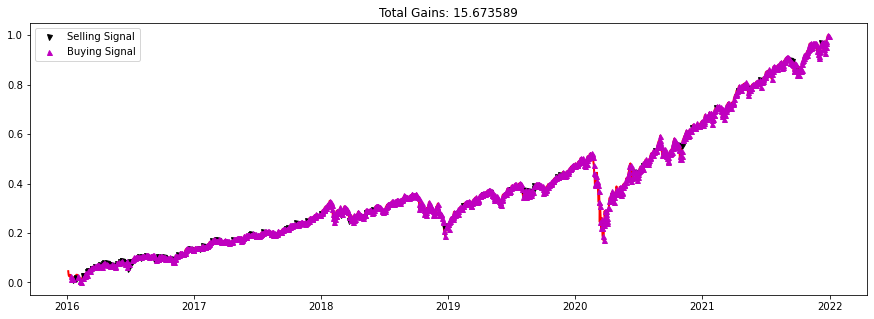

In [206]:
## graficamos el modelo
plot_behavior(data_input=data,
             states_buy=states_buy,
             states_sell=states_sell,
             profit=total_profit)

In [211]:
## 4
data=TestX

l=len(data)


states_sell=[]
states_buy=[]

total_profit=0
agent.inventory=[]

for t in range(l): #itero sobre días
    #Dame la mejor acción (compra/venta/mantener)
    state=getState(data,t,window_size+1)
    action=agent.act(state)
    #Mantenmos la posición y obtenemos el precio siguinte
    #next_state=getState(data,t+1,window_size+1)
    ## Aca como solo estamos testeando no me interesa el estado adelante sino solo el actual para calcular mi acción
    ## y por lo tanto, el reward
    
    reward=0
    if action==1: #buy
        agent.inventory.append(data[t])
        states_buy.append(t)
        print("Buy: "+ formatPrice(data[t]))

    elif action==2 and len(agent.inventory)>0: #sell
        bought_price=agent.inventory.pop(0)
        #3 Calculamos el reward de la Venta
        reward=max((data[t]-bought_price),0)
        total_profit+=data[t]-bought_price
        states_sell.append(t)
        print("Sell: " + formatPrice(data[t]) + " ' Profit:'"+ formatPrice(data[t]-bought_price))

Buy: $1.00
Buy: $1.00
Buy: $0.97
Buy: $0.97
Buy: $0.96
Buy: $0.96
Buy: $0.97
Buy: $0.98
Buy: $0.96
Buy: $0.96
Buy: $0.93
Buy: $0.92
Buy: $0.90
Buy: $0.87
Buy: $0.88
Buy: $0.86
Buy: $0.86
Buy: $0.85
Buy: $0.89
Buy: $0.91
Buy: $0.92
Buy: $0.94
Buy: $0.90
Buy: $0.91
Buy: $0.90
Buy: $0.91
Buy: $0.94
Buy: $0.91
Buy: $0.88
Buy: $0.88
Buy: $0.90
Buy: $0.90
Buy: $0.87
Buy: $0.86
Buy: $0.85
Buy: $0.82
Buy: $0.84
Buy: $0.87
Buy: $0.87
Buy: $0.85
Buy: $0.87
Buy: $0.87
Buy: $0.85
Buy: $0.81
Buy: $0.80
Buy: $0.84
Buy: $0.83
Buy: $0.82
Buy: $0.81
Buy: $0.84
Buy: $0.87
Buy: $0.88
Buy: $0.90
Buy: $0.90
Buy: $0.91
Buy: $0.90
Buy: $0.92
Buy: $0.92
Buy: $0.94
Buy: $0.95
Buy: $0.94
Buy: $0.92
Buy: $0.93
Buy: $0.94
Buy: $0.92
Buy: $0.91
Buy: $0.91
Buy: $0.91
Buy: $0.88
Buy: $0.88
Buy: $0.89
Buy: $0.88
Buy: $0.88
Buy: $0.90
Buy: $0.90
Buy: $0.88
Buy: $0.84
Buy: $0.85
Buy: $0.81
Buy: $0.81
Buy: $0.85
Buy: $0.79
Buy: $0.80
Buy: $0.81
Buy: $0.85
Buy: $0.80
Buy: $0.79
Buy: $0.75
Buy: $0.75
Buy: $0.73
Buy: $0.73

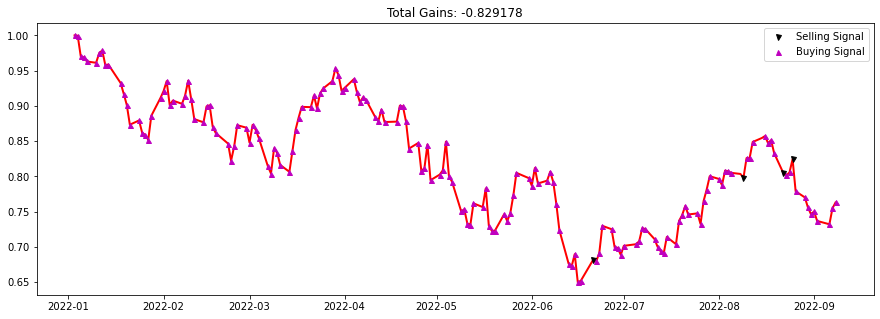

In [215]:
def plot_behavior(data_input,states_buy,states_sell,profit):
    n=len(data_input)
    mdates=data_2[(len(data_2)-n):].index
    fig=plt.figure(figsize=(15,5))
    plt.plot(mdates,data_input,color="r",lw=2)
    plt.plot(mdates,data_input,"v",markersize=5,color="k",
            label="Selling Signal",markevery=states_sell)
    plt.plot(mdates,data_input,"^",markersize=5,color="m",
            label="Buying Signal",markevery=states_buy)    
    plt.title("Total Gains: %f"%(profit))
    plt.legend()
    plt.show()
## graficamos el modelo
plot_behavior(data_input=data,
             states_buy=states_buy,
             states_sell=states_sell,
             profit=total_profit)

para mejorar el moelo tal vez intentaria incluir mas información dentro del estado del producto, para que tal vez el modelo tenga mas información para decidirs sobre cuando tomar una acción u otra. Pero el otrao problema importante que hubo es que en la muestra en la que se entreno la serie, claramente tenia una tendencia positiva, mientras que en la que la testeamos tenia claramente una tendencia negativa por lo que nunca tuvo la oportunidad de entrenarse con datos que fueran similares a los que se estan usando para testearlo (obviamente esto es debido principalemnte al comportamiento atipico que se vio durante la pandemia que de hecho, casi ningun modelo logra tener en cuenta). Es por esto que incluso modelos tan poderosos como DQN no sirven de nada si no se tienen buenos datos para su estimación y de hecho, tambien es por eso que es importante calibrar los modelos constantemente porque pueden haber cambios estructurales en la economia que cambien de manera drastica la manera en la que se desempeña el modelo.

**Parte Práctica Construir un Portafolio**
1. Descarguen los once sectores del S&P500: `["XLF","XLV","XLU","XLB","XLP","XLK","XLE","XLY","XLI","XLRE","VOX"]` del 2010 al 2022. Entrenen su Modelo con información del 2010 al 2020. El 2021 y 2022 será el Test. 
2. Repliquen la Red Neuronal de un Portafolio que hicimos en Clase. Mismo Benchmark Equal-Weighted
3. Los parámetros serían: 
```python 
N_ASSETS = 11 
agent = Agent(N_ASSETS)
env = CryptoEnvironment()
window_size = 180
episode_count = 50
batch_size = 32
rebalance_period = 90`

```
4. Utilicen el siguiente código para probar su modelo en el 2021 y 2022. 

```python 

agent.is_eval = True
actions_equal, actions_rl = [], []
result_equal, result_rl = [], []
for t in range(window_size, len(env.data), rebalance_period):

    date1 = t-rebalance_period
    s_ = env.get_state(t, window_size)
    action = agent.act(s_)

    weighted_returns, reward = env.get_reward(action[0], date1, t)
    weighted_returns_equal, reward_equal = env.get_reward(
        np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

    result_equal.append(weighted_returns_equal.tolist())
    actions_equal.append(np.ones(agent.portfolio_size) / agent.portfolio_size)
    
    result_rl.append(weighted_returns.tolist())
    actions_rl.append(action[0])
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_rl_vis = [item for sublist in result_rl for item in sublist]
plt.figure()
plt.plot(np.array(result_equal_vis).cumsum(), label = 'Benchmark', color = 'grey',ls = '--')
plt.plot(np.array(result_rl_vis).cumsum(), label = 'Deep RL portfolio', color = 'black',ls = '-')
plt.show()

```

5. ¿le ganaron al Benchmark? ¿Qué pesos tiene su portafolio al día de hoy invertidos en los once sectores?

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
from keras.regularizers import l2
from collections import deque
import pandas_datareader.data as web

In [11]:
## 1 
## cargamos la info de los ETFs hasta el 2022
etfs=(["XLF","XLV","XLU","XLB","XLP","XLK","XLE","XLY","XLI","XLRE","VOX"]) #Sectores del S&P 500
etfs1=web.DataReader(etfs,"yahoo",start="2010-01-01")
etfs1=etfs1.loc[:,("Adj Close")]

## dejamos solo la info de 2010 hasta 2020 en train y el resto en test
etfs1,etfs1_test=etfs1[etfs1.index<pd.to_datetime('2020-01-01')],etfs1[etfs1.index>=pd.to_datetime('2020-01-01')]

In [14]:
## 2
##################################
# cargando primero las funciones #
##################################

#Definir una función portafolio que calcule rends y vols históricas

def portfolio(returns,weights):
    weights=np.array(weights)
    rets=returns.mean()*252
    covs=returns.cov()*252
    P_ret=np.sum(rets*weights)
    P_vol=np.sqrt(np.dot(weights.T,np.dot(covs,weights)))
    P_sharpe=P_ret/P_vol
    return np.array([P_ret,P_vol,P_sharpe])

In [15]:
class ETFEnvironment: 
    def __init__(self,prices=etfs1,capital=1e6):
        self.prices=prices
        self.capital=capital
        self.data=self.load_data()

    def load_data(self):
        data=etfs1
        return data   

    def preprocess_state(self,state):
        return state

    
    def get_state(self,t,lookback,is_cov_matrix=True,is_raw_time_series=False):

        assert lookback<=t
       
        decision_making_state=self.data.iloc[t-lookback:t]
        
        decision_making_state=decision_making_state.pct_change().dropna()

        if is_cov_matrix:
            x=decision_making_state.cov()
            return x

        else:
            if is_raw_time_series:
                decision_making_state=self.data.iloc[t-lookback:t]
            return self.preprocess_state(decision_making_state)


    def get_reward(self,action,action_t,reward_t,alpha=.01):



        def local_portfolio(returns,weights):
            
            weights=np.array(weights)
            rets=returns.mean()#*252
            covs=returns.cov()#*252
            P_ret=np.sum(rets*weights)
            P_vol=np.sqrt(np.dot(weights.T,np.dot(covs,weights)))
            P_sharpe=P_ret/P_vol
            return np.array([P_ret,P_vol,P_sharpe])

        data_period=self.data[action_t:reward_t]
        weights=action
        returns=data_period.pct_change().dropna()
        sharpe=local_portfolio(returns,weights)[-1]

            
            
        sharpe=np.array([sharpe]*len(self.data.columns))

        rew=(data_period.values[-1]-data_period.values[0])/data_period.values[0]

            
        return np.dot(returns,weights), sharpe

In [16]:
class Agent: 
    def __init__(self,portfolio_size,is_eval=False,allow_short=True):
        
        self.portfolio_size=portfolio_size
        self.allow_short=allow_short
        self.input_shape=(portfolio_size,portfolio_size,) #recibe matriz de var-cov        
        
        self.action_size=3 #hold/sit, buy, sell
        self.memory4replay=[]

        self.is_eval=is_eval
        self.gamma=0.95
        self.epsilon=1.0
        self.epsilon_min=.01
        self.epsilon_decay=.99

        
        self.firstIter=True
        self.alpha=0.5
        self.model=self._model()

        
    def _model(self):
        inputs=Input(shape=self.input_shape)
        x=Flatten()(inputs)
        x=Dense(100,activation='elu')(x)
        x=Dropout(0.5)(x)
        x=Dense(50,activation="elu")(x)
        x=Dropout(0.5)(x)
        predictions=[]

        for i in range(self.portfolio_size):
            asset_dense=Dense(self.action_size,activation='linear')(x)
            predictions.append(asset_dense)

        model=Model(inputs=inputs,outputs=predictions)
        model.compile(optimizer='adam',loss='mse')
        return model    
    
    
    
    def nn_pred_to_weights(self,pred,allow_short=False):
        weights=np.zeros(len(pred))
        raw_weights=np.argmax(pred,axis=-1)

        saved_min=None
        for e, r in enumerate(raw_weights):

            if r==0: #hold/mantener/sit
                weights[e]=0

                
            elif r==1: #buy
                weights[e]=np.abs(pred[e][0][r]) #aquí estoy accediendo al valor de Q asociado a la "Compra" 
                #y lo esoty poniendo como peso. Es la "Compra" porque es el valor máximo contra Venta y Mantener. 
            else: 
                weights[e]=-np.abs(pred[e][0][r]) #el negativo es porque lo estás vendiendo

                
        #Sumar valores absolutes 
        if not allow_short: #Es el caso en el que quiero todo positivo. Le sumamos el mínimo a todo para 
            #que fuera todo positivo 
            weights += np.abs(np.min(weights))
            saved_min=np.abs(np.min(weights))
            saved_sum=np.sum(weights)
        else: 
            saved_sum=np.sum(np.abs(weights)) #aquí solamente es el denominador =que sume 1. 
        #sí permito números negativos irme corto. Allow_short=True l
        weights /= saved_sum
        return weights, saved_min, saved_sum

    
    def act(self,state):
        #El caso cuando todavía no le creo tanto al modelo (explorando)

        if not self.is_eval and random.random()<=self.epsilon:
            
            #Que les dé pesos random
            
            #Si no le creo al modelo tengo que desarrolar lo de cuando sí le creo: que es cuando 
            #se permiten ventas en corto y que sume 1. 
            w=np.random.normal(0,1,size=(self.portfolio_size,))
            saved_min=None
            if not self.allow_short:
            #cuando no permito ventas en corto me aseguro que todo 
            #esté positivo
                w += np.abs(np.min(w))
                saved_min=np.abs(np.min(w))
            #sí permito ventas en corto, aquí hay valores negativos
            saved_sum=np.sum(w)
            w /= saved_sum
            return w, saved_min, saved_sum

       #donde sí le creo a mi modelo y lo exploto
        pred=self.model.predict(np.expand_dims(state.values,0))

        return self.nn_pred_to_weights(pred,self.allow_short)

                

       #El método de Experiencia. Eq Bellman, Q-value
    def expReplay(self,batch_size):

        def weights_to_nn_preds_with_reward(action_weights,
                                           reward,
                                           Q_star=np.zeros((self.portfolio_size,self.action_size))):
            Q=np.zeros((self.portfolio_size,self.action_size))

            for i in range(self.portfolio_size):
                if action_weights[i]==0:
                    Q[i][0]=reward[i] + self.gamma*np.max(Q_star[i][0]) #aquí np.max hace que te arroje float
          
        
                elif action_weights[i]>0:
                    Q[i][1]=reward[i] + self.gamma*np.max(Q_star[i][1])

                else:
                    Q[i][2]=reward[i] + self.gamma*np.max(Q_star[i][2])  
            return Q
        
        def restore_Q_from_weights_and_stats(action):
            #action serán los weights que arroja su modelo: su red (return weights, saved_min, saved_sum)
            #estamos haciendo esto para reconstruir Q, desde los weights y cada entrada
            action_weights, action_min, action_sum=action[0],action[1], action[2]
            action_weights=action_weights*action_sum

            if action_min != None:
                action_weights=action_weights-action_min
            return action_weights

        #Vamos a actualizar nuestra Q (reward)
        for (s,s_,action,reward,done) in self.memory4replay:

            action_weights=restore_Q_from_weights_and_stats(action)
            Q_learned_value=weights_to_nn_preds_with_reward(action_weights,reward)
            s, s_ =s.values, s_.values
            if not done: 
                Q_star=self.model.predict(np.expand_dims(s_,0))
                Q_learned_value=weights_to_nn_preds_with_reward(action_weights,reward,np.squeeze(Q_star))

            Q_learned_value=[xi.reshape(1,-1) for  xi in Q_learned_value]
            Q_current_value=self.model.predict(np.expand_dims(s,0))

            Q=[ np.add(a*(1-self.alpha),q*self.alpha) for a, q in zip(Q_current_value,Q_learned_value)]

            self.model.fit(np.expand_dims(s,0),Q,epochs=1,verbose=0)

        #Implementar lo de la Codicia de qué tanto le creo a mi 
        #modelo
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [23]:
## 3
## definiendo los parametros.
N_ASSETS = 10
agent = Agent(N_ASSETS)
env = ETFEnvironment()
window_size = 180
episode_count = 50
batch_size = 32
rebalance_period = 90

In [24]:
sum(env.data['XLRE'].isna())

1451

In [25]:
## vamos a eliminar XLRE porque es un activo que no tiene observaciones durante muchos periodos y podria dañar
## el balanceo del portafolio
env.data=env.data.drop(columns=['XLRE'])

In [26]:
env.data

Symbols,XLF,XLV,XLU,XLB,XLP,XLK,XLE,XLY,XLI,VOX
Date,,,,,,,,,,
2010-01-04,9.491675,25.416250,19.786093,25.765633,18.943321,19.247610,38.873894,25.373497,22.074820,43.094883
2010-01-05,9.666131,25.166986,19.550545,25.848936,18.950436,19.222794,39.191174,25.466528,22.152775,43.386074
2010-01-06,9.685517,25.424286,19.665136,26.288221,18.936218,19.007738,39.660488,25.500368,22.199537,42.699169
2010-01-07,9.892279,25.512733,19.576008,26.083721,18.936218,18.933292,39.601002,25.711811,22.441174,42.542389
2010-01-08,9.834124,25.552942,19.556913,26.447256,18.872292,19.057371,39.858788,25.703354,22.799736,42.348270
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28.963326,97.990845,58.729855,57.786755,58.589485,88.809998,52.214863,121.690636,78.113556,92.138397
2019-12-26,29.123816,97.924240,58.830681,58.042023,58.645355,89.471901,52.198002,123.175858,78.295044,92.852867
2019-12-27,29.048292,97.952789,59.004807,57.824566,58.906128,89.462166,51.978905,123.166092,78.228188,92.676704


In [27]:
data_length=len(env.data)
data_length

2516

Episode 0/50 epsilon 1.0


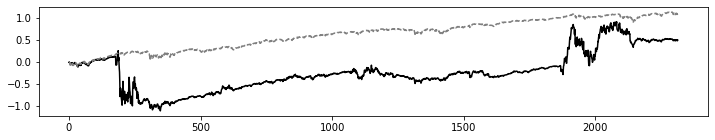

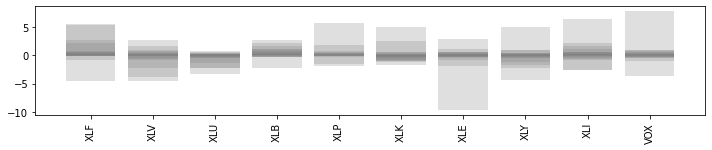

Episode 1/50 epsilon 1.0
1/1 [==============================] - 0s 21ms/step


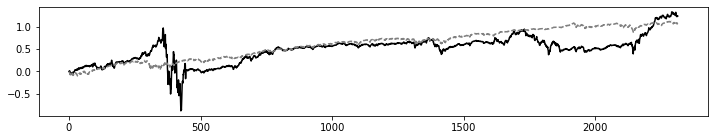

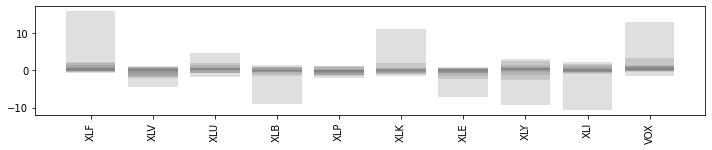

Episode 2/50 epsilon 0.99
1/1 [==============================] - 0s 23ms/step


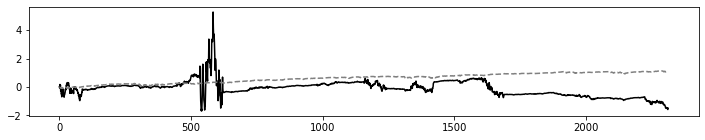

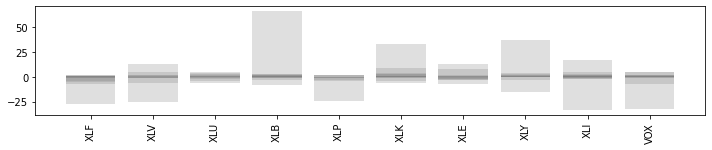

Episode 3/50 epsilon 0.9801
1/1 [==============================] - 0s 34ms/step


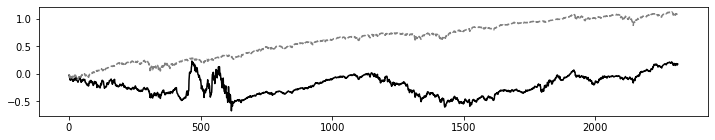

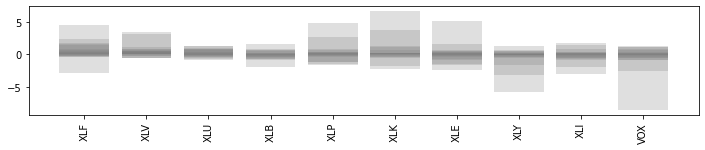

Episode 4/50 epsilon 0.9702989999999999
1/1 [==============================] - 0s 22ms/step


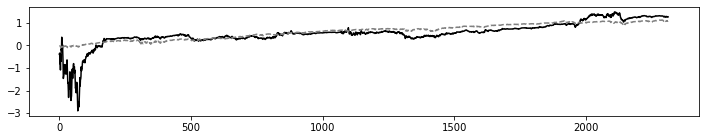

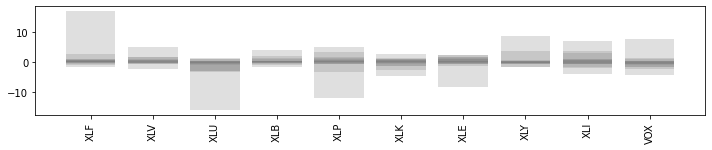

Episode 5/50 epsilon 0.9702989999999999
1/1 [==============================] - 0s 22ms/step


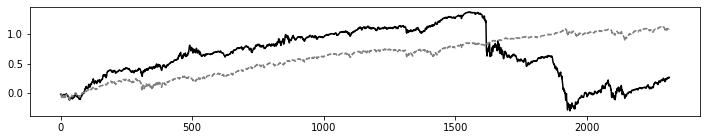

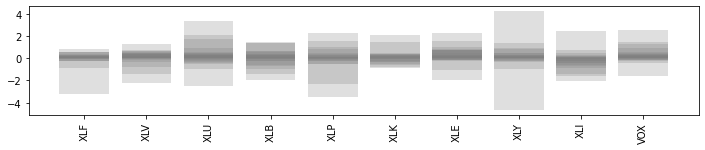

Episode 6/50 epsilon 0.96059601
1/1 [==============================] - 0s 34ms/step


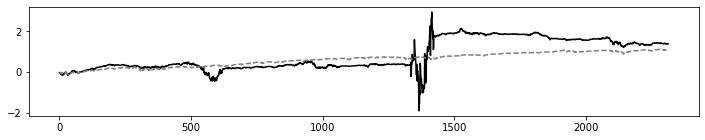

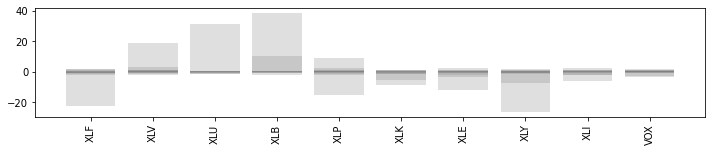

Episode 7/50 epsilon 0.9509900498999999
1/1 [==============================] - 0s 26ms/step


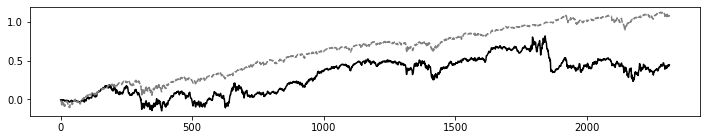

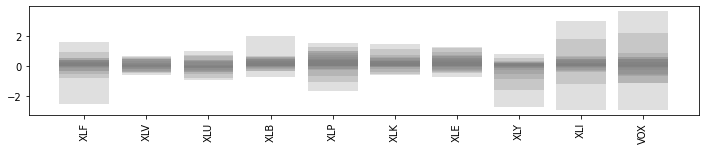

Episode 8/50 epsilon 0.9414801494009999
1/1 [==============================] - 0s 36ms/step


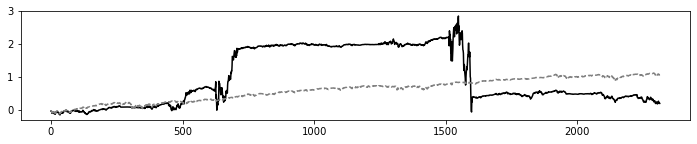

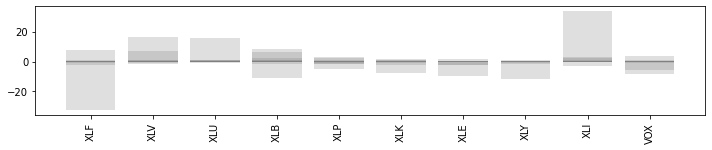

Episode 9/50 epsilon 0.9320653479069899
1/1 [==============================] - 0s 32ms/step


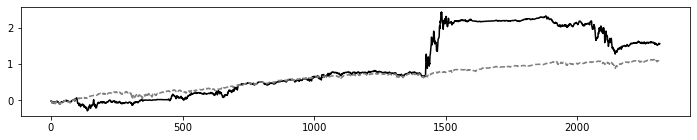

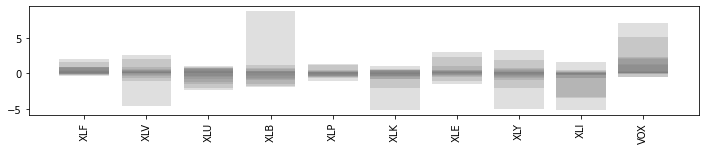

Episode 10/50 epsilon 0.9320653479069899
1/1 [==============================] - 0s 22ms/step


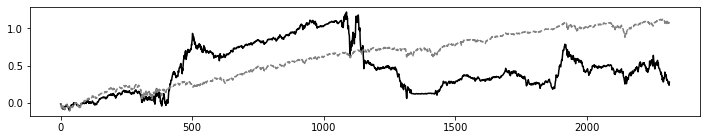

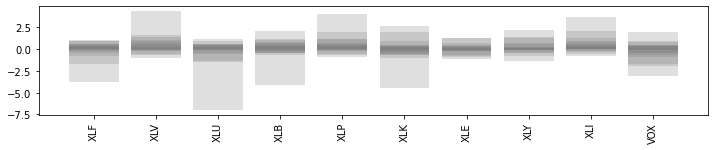

Episode 11/50 epsilon 0.92274469442792
1/1 [==============================] - 0s 28ms/step


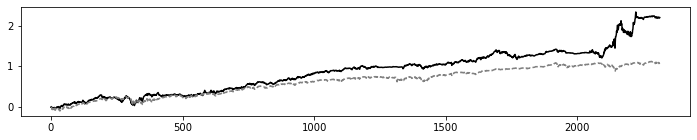

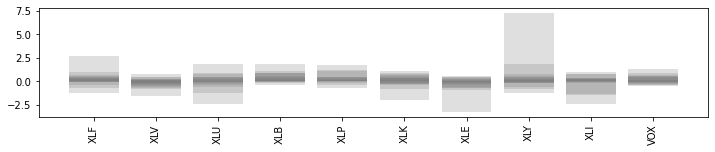

Episode 12/50 epsilon 0.9135172474836407
1/1 [==============================] - 0s 32ms/step


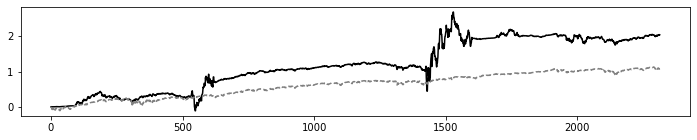

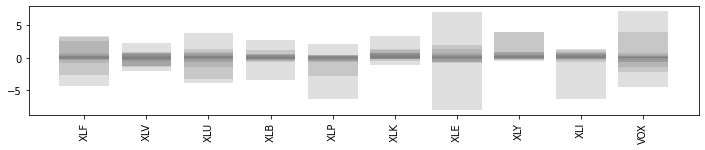

Episode 13/50 epsilon 0.9043820750088043
1/1 [==============================] - 0s 21ms/step


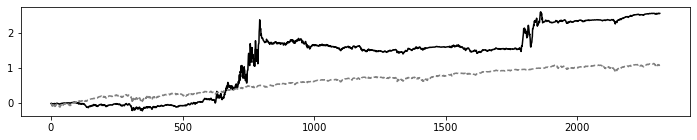

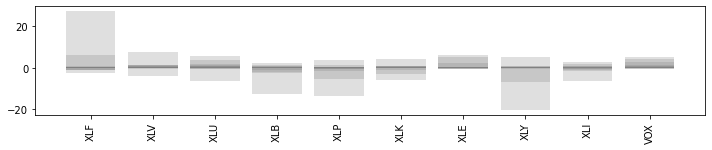

Episode 14/50 epsilon 0.8953382542587163
1/1 [==============================] - 0s 24ms/step


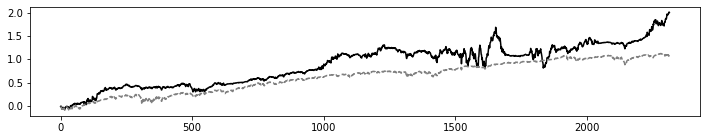

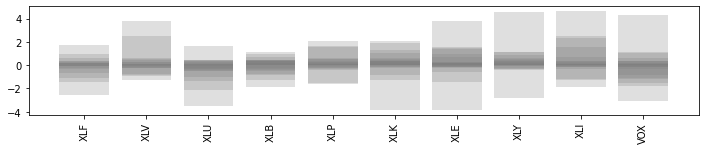

Episode 15/50 epsilon 0.8953382542587163
1/1 [==============================] - 0s 29ms/step


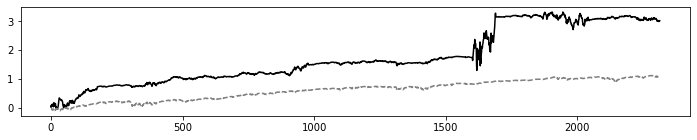

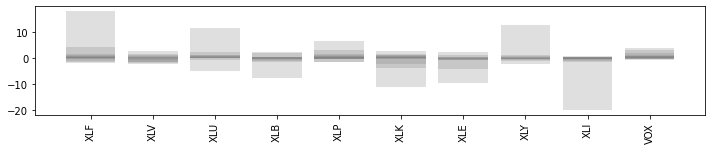

Episode 16/50 epsilon 0.8863848717161291
1/1 [==============================] - 0s 23ms/step


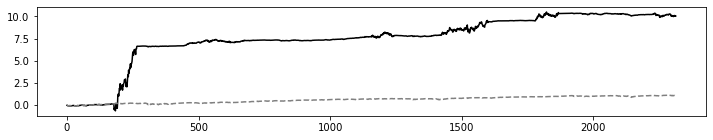

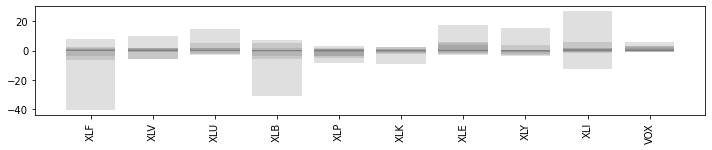

Episode 17/50 epsilon 0.8775210229989678
1/1 [==============================] - 0s 24ms/step


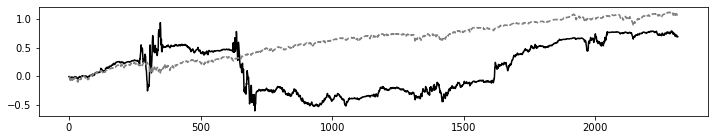

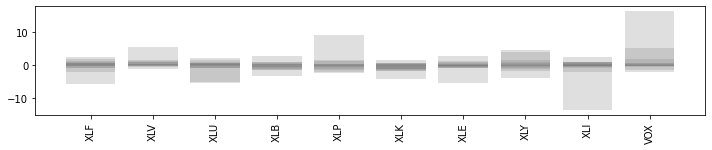

Episode 18/50 epsilon 0.8687458127689781
1/1 [==============================] - 0s 30ms/step


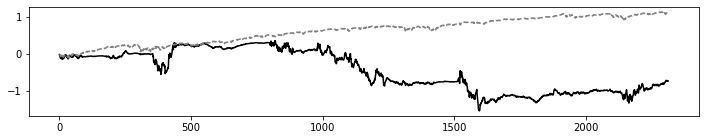

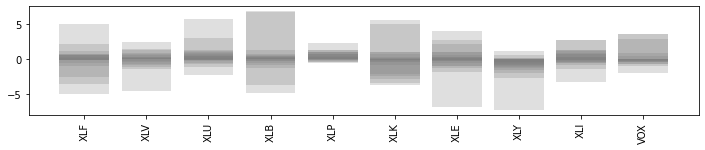

Episode 19/50 epsilon 0.8687458127689781
1/1 [==============================] - 0s 23ms/step


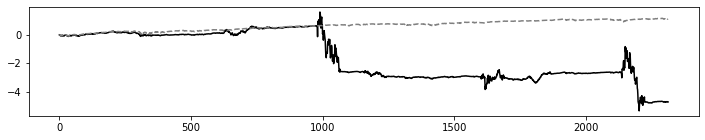

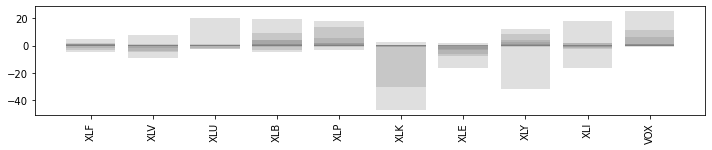

Episode 20/50 epsilon 0.8600583546412883
1/1 [==============================] - 0s 28ms/step


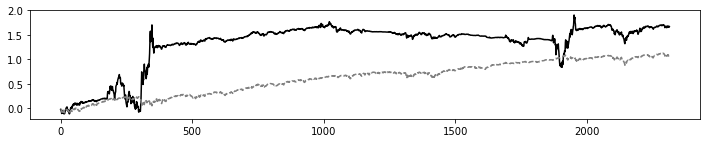

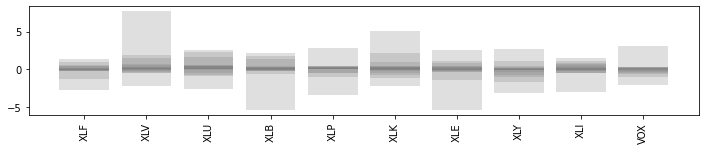

Episode 21/50 epsilon 0.8514577710948754
1/1 [==============================] - 0s 28ms/step


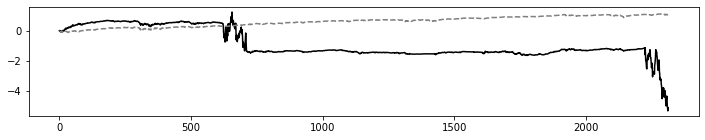

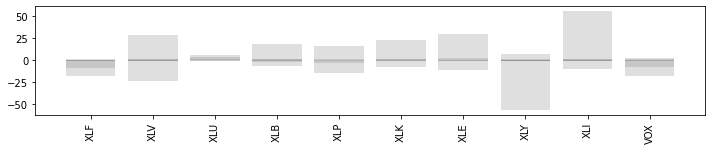

Episode 22/50 epsilon 0.8429431933839266
1/1 [==============================] - 0s 41ms/step


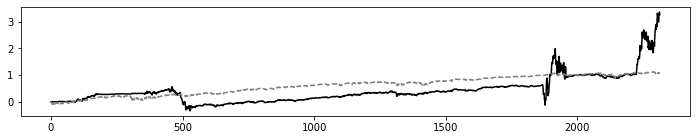

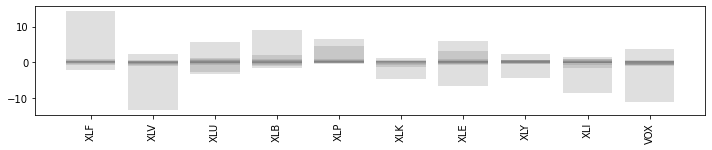

Episode 23/50 epsilon 0.8345137614500874
1/1 [==============================] - 0s 29ms/step


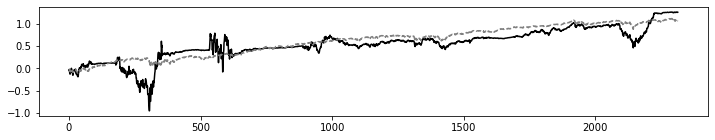

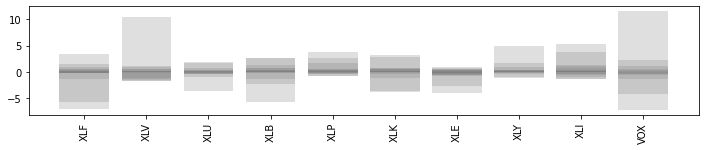

Episode 24/50 epsilon 0.8345137614500874
1/1 [==============================] - 0s 19ms/step


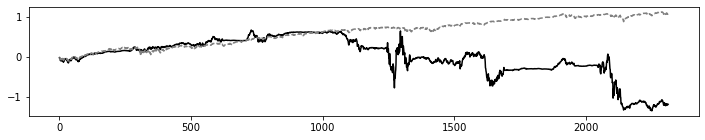

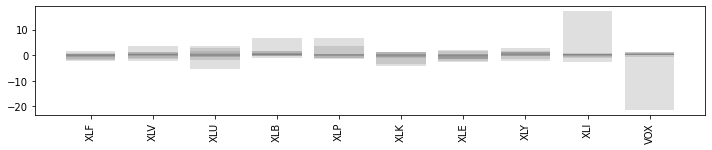

Episode 25/50 epsilon 0.8261686238355865
1/1 [==============================] - 0s 20ms/step


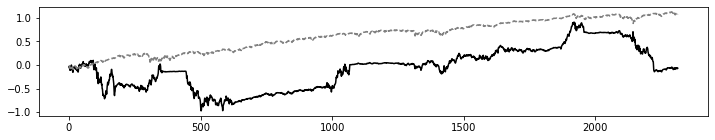

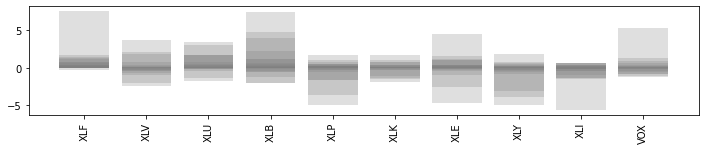

Episode 26/50 epsilon 0.8179069375972307
1/1 [==============================] - 0s 24ms/step


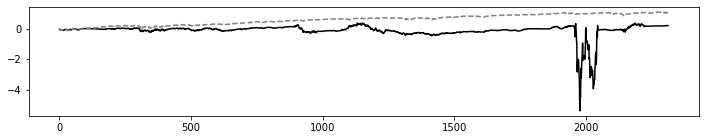

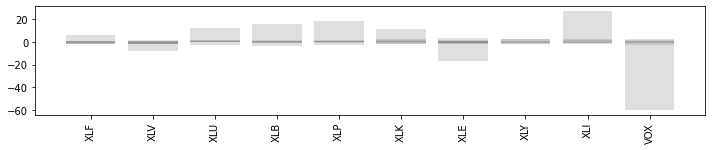

Episode 27/50 epsilon 0.8097278682212583
1/1 [==============================] - 0s 22ms/step


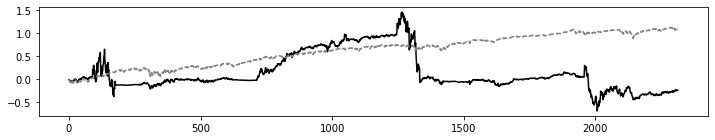

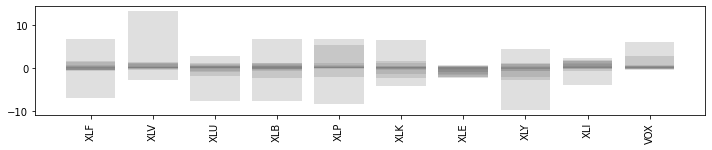

Episode 28/50 epsilon 0.8016305895390458
1/1 [==============================] - 0s 21ms/step


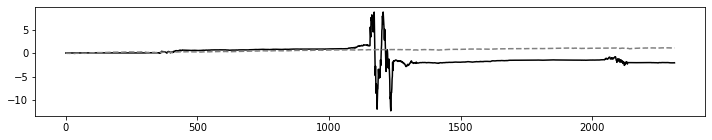

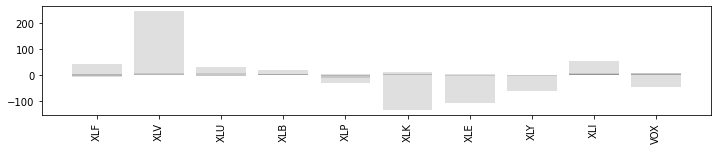

Episode 29/50 epsilon 0.8016305895390458
1/1 [==============================] - 0s 20ms/step


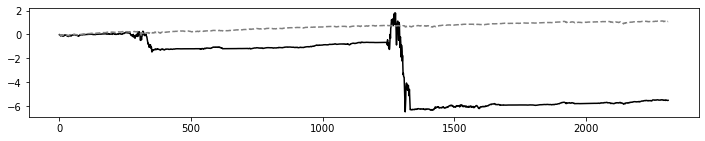

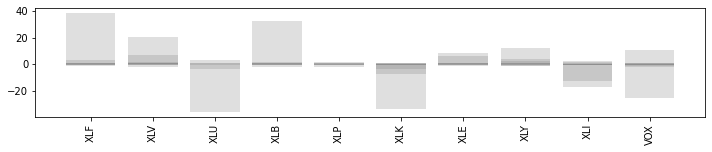

Episode 30/50 epsilon 0.7936142836436553
1/1 [==============================] - 0s 33ms/step


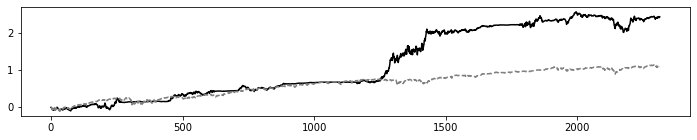

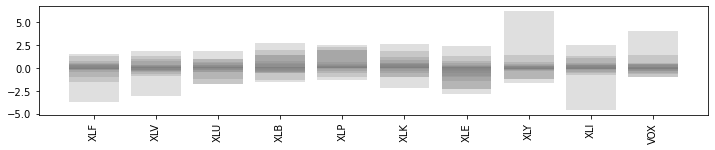

Episode 31/50 epsilon 0.7856781408072188
1/1 [==============================] - 0s 22ms/step


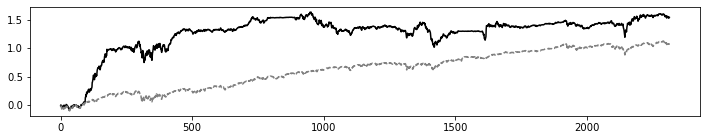

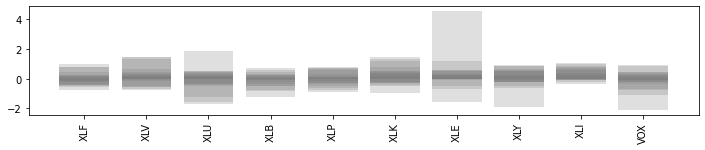

Episode 32/50 epsilon 0.7778213593991465
1/1 [==============================] - 0s 25ms/step


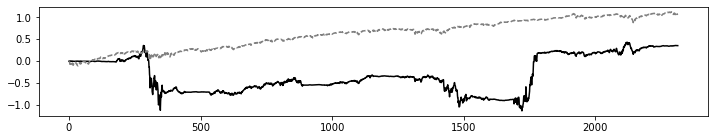

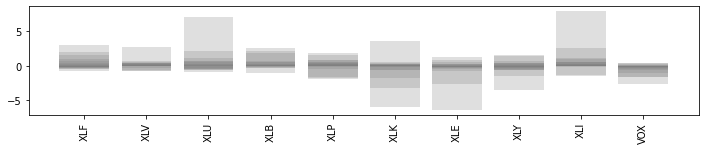

Episode 33/50 epsilon 0.7700431458051551
1/1 [==============================] - 0s 27ms/step


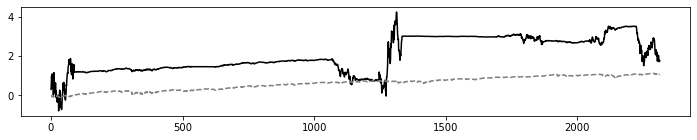

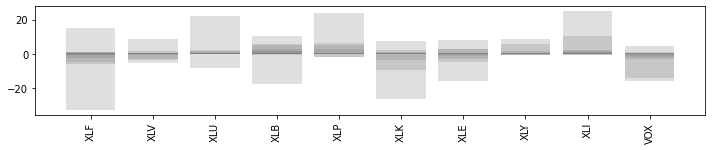

Episode 34/50 epsilon 0.7700431458051551
1/1 [==============================] - 0s 32ms/step


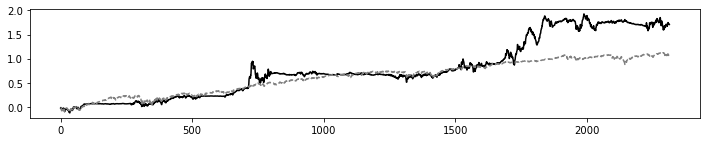

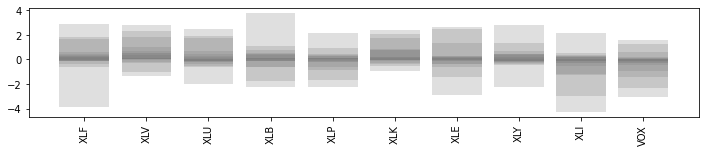

Episode 35/50 epsilon 0.7623427143471035
1/1 [==============================] - 0s 30ms/step


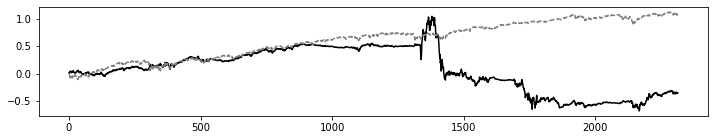

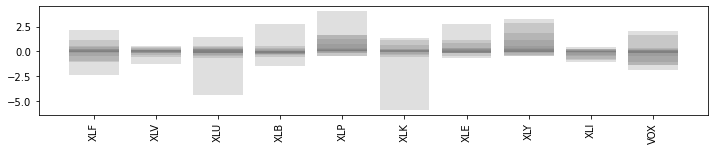

Episode 36/50 epsilon 0.7547192872036325
1/1 [==============================] - 0s 34ms/step


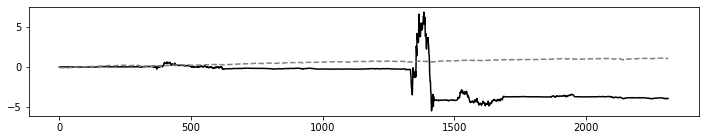

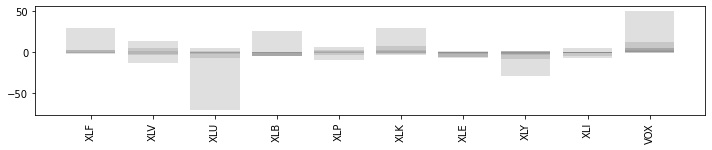

Episode 37/50 epsilon 0.7471720943315961
1/1 [==============================] - 0s 31ms/step


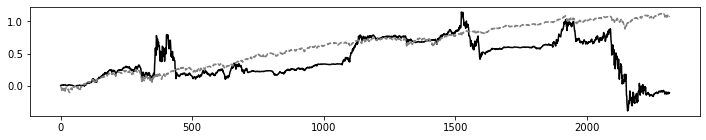

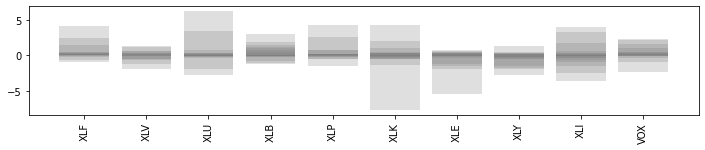

Episode 38/50 epsilon 0.7471720943315961
1/1 [==============================] - 0s 28ms/step


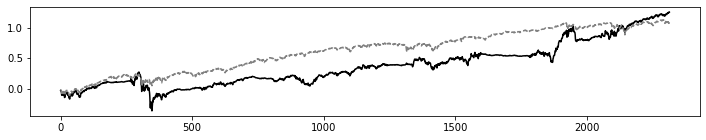

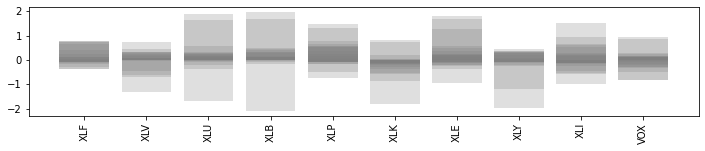

Episode 39/50 epsilon 0.7397003733882802
1/1 [==============================] - 0s 25ms/step


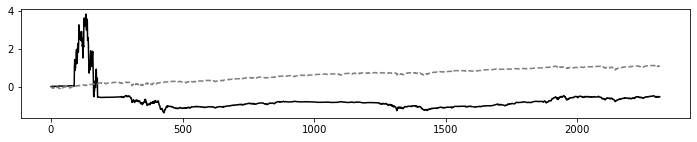

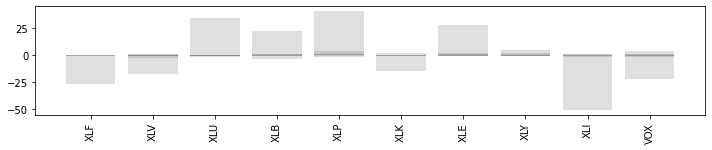

Episode 40/50 epsilon 0.7323033696543974
1/1 [==============================] - 0s 27ms/step


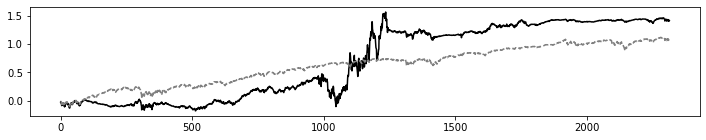

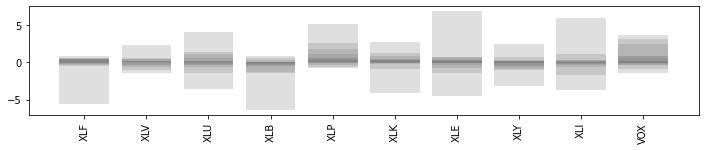

Episode 41/50 epsilon 0.7249803359578534
1/1 [==============================] - 0s 41ms/step


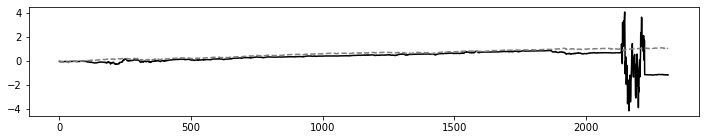

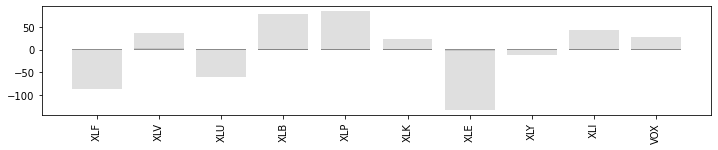

Episode 42/50 epsilon 0.7177305325982748
1/1 [==============================] - 0s 28ms/step


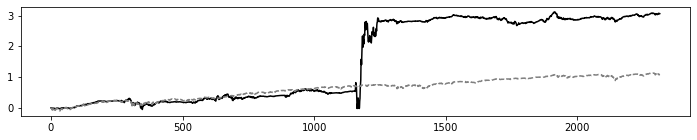

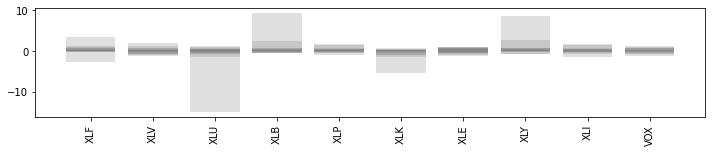

Episode 43/50 epsilon 0.7177305325982748
1/1 [==============================] - 0s 26ms/step


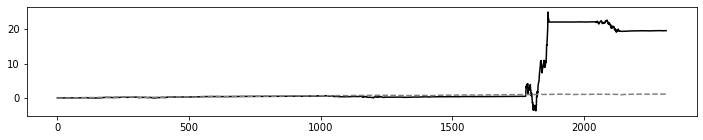

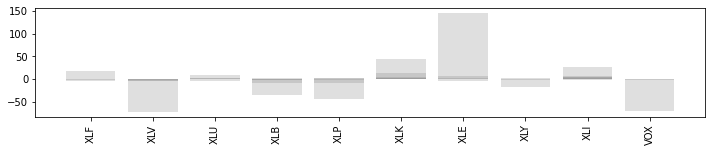

Episode 44/50 epsilon 0.7105532272722921
1/1 [==============================] - 0s 22ms/step


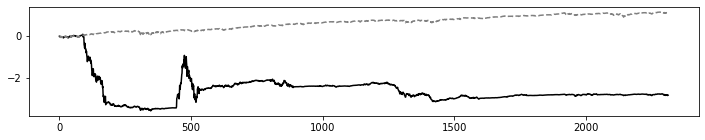

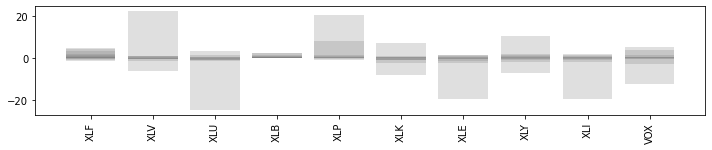

Episode 45/50 epsilon 0.7034476949995692
1/1 [==============================] - 0s 24ms/step


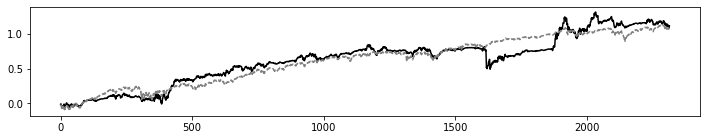

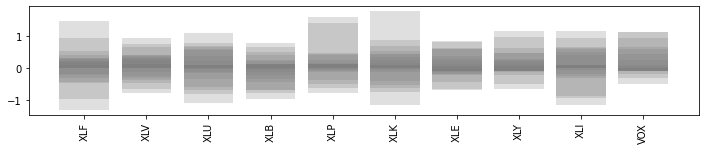

Episode 46/50 epsilon 0.6964132180495735
1/1 [==============================] - 0s 28ms/step


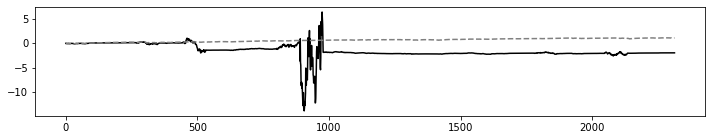

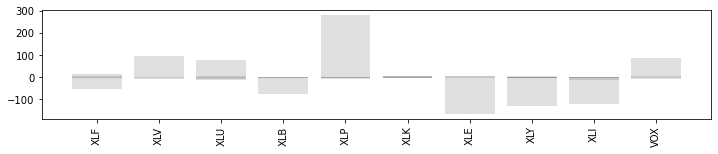

Episode 47/50 epsilon 0.6894490858690777
1/1 [==============================] - 0s 23ms/step


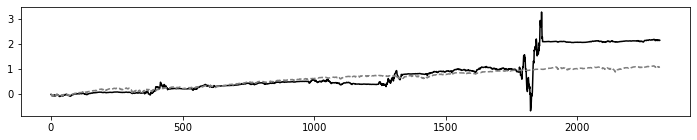

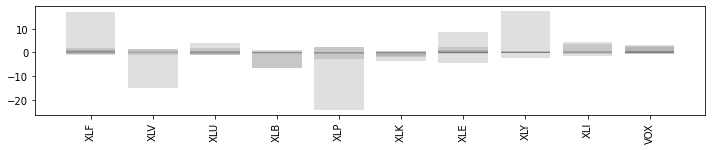

Episode 48/50 epsilon 0.6894490858690777
1/1 [==============================] - 0s 27ms/step


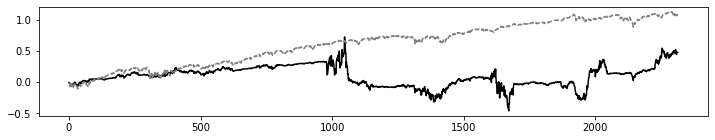

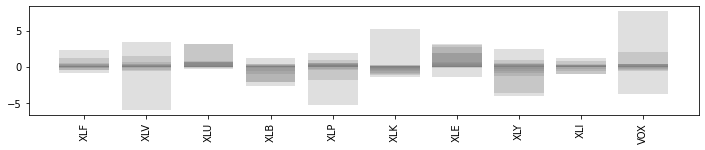

Episode 49/50 epsilon 0.682554595010387
1/1 [==============================] - 0s 25ms/step


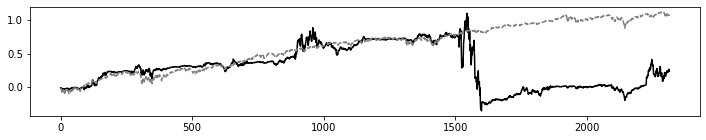

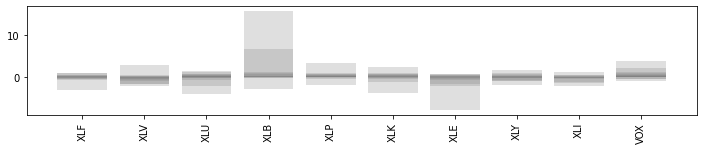

Episode 50/50 epsilon 0.6757290490602831
1/1 [==============================] - 0s 35ms/step


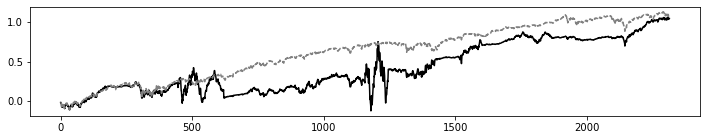

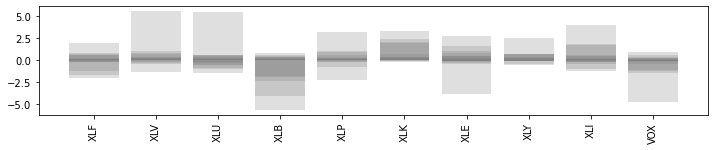

In [28]:
for e in range(episode_count+1):
    agent.is_eval=False
    data_length=len(env.data)

    
    
    returns_history=[]
    returns_history_equal=[]

    
    rewards_history=[]
    equal_rewards=[]

    actions_to_show=[]

    
    
    print("Episode " + str(e) + "/" + str(episode_count),'epsilon',agent.epsilon)

    
    
    
    #1 Generamos Estado/Precios
    s=env.get_state(np.random.randint(window_size+1,data_length-window_size-1),window_size)
    total_profit=0
    for t in range(window_size,data_length,rebalance_period):
        date1=t-rebalance_period
        s_=env.get_state(t,window_size)
        action=agent.act(s_)

        actions_to_show.append(action[0])
        weighted_return,reward=env.get_reward(action[0],date1,t)

        weighted_return_equal,reward_equal=env.get_reward(
            np.ones(agent.portfolio_size)/agent.portfolio_size,date1,t)

        rewards_history.append(reward)
        equal_rewards.append(reward_equal)

        returns_history.extend(weighted_return)
        returns_history_equal.extend(weighted_return_equal)        

        done=True if t==data_length else False
        agent.memory4replay.append((s,s_,action,reward,done))

        #Cada cuando va a actualizar el modelo
        if len(agent.memory4replay)>batch_size:

            agent.expReplay(batch_size)
            agent.memory4replay=[]
        s=s_

        
    r1_result=np.array(returns_history).cumsum()
    equal_result=np.array(returns_history_equal).cumsum()

    
    plt.figure(figsize=(12,2))
    plt.plot(r1_result,color='black',ls="-")
    plt.plot(equal_result,color='grey',ls="--")
    plt.show()

    
    plt.figure(figsize=(12,2))
    for a in actions_to_show:
        plt.bar(np.arange(N_ASSETS),a,color='grey',alpha=0.25)

        plt.xticks(np.arange(N_ASSETS),env.data.columns,rotation="vertical")
    plt.show()

1/1 [==============================] - 0s 22ms/step


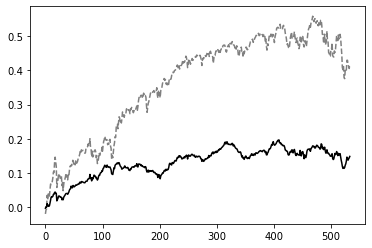

In [29]:
## 4
agent.is_eval = True
actions_equal, actions_rl = [], []
result_equal, result_rl = [], []

env.data=etfs1_test.drop(columns
                         =['XLRE'])

for t in range(window_size, len(env.data), rebalance_period):

    date1 = t-rebalance_period
    s_ = env.get_state(t, window_size)
    action = agent.act(s_)

    weighted_returns, reward = env.get_reward(action[0], date1, t)
    weighted_returns_equal, reward_equal = env.get_reward(
        np.ones(agent.portfolio_size) / agent.portfolio_size, date1, t)

    result_equal.append(weighted_returns_equal.tolist())
    actions_equal.append(np.ones(agent.portfolio_size) / agent.portfolio_size)

    result_rl.append(weighted_returns.tolist())
    actions_rl.append(action[0])
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_rl_vis = [item for sublist in result_rl for item in sublist]
plt.figure()
plt.plot(np.array(result_equal_vis).cumsum(), label = 'Benchmark', color = 'grey',ls = '--')
plt.plot(np.array(result_rl_vis).cumsum(), label = 'Deep RL portfolio', color = 'black',ls = '-')
plt.show()

In [ ]:
## 

# lec09- Series de Tiempo

1. Vamos a poner a competir los siguintes modelo: 
    1. Realizar Red Neuronal con Stacking (Red Neuronal como MetaModelo y como Modelos Base Modelos del Módulo 4 (lo hicimos en clase))
    2. Algun modelo del módulo 4 (Voting, Random Forest, Adaboost,Stacking, etc)
    3. Un modelo Arima

Objetivo: Predecir el rendimiento semanal (t+1) del sector de EEUU Biotecnología (XBI) en el 2022. 
Utiliza toda la información disponible del instrumento (desde 2006) . Train hasta el 2021 (incluyendo). Y test 2022. 

El objetivo será tener el modelo con el menor MAE en el Test del 2022. 

Recuerden con con el web.datareader que vimos en clase pueden acceder a las bases de la Reserva Federal de St Louis y Yahoo Finance. Son miles de indices a un click de distancia. 

2. Escoge al menos 10 regresores: 
    1. Al menos 2 divisas
    2. Al menos 2 rezagos del S&P500 o empresas representativas del Sector (Moderna, Pfizer,Merck, etc)
    3. Al menos 3 variables ecónomicas (PIB, Tasas de Interés, Ventas Minoristas, Confianza del Consumidor, PMI, etc)
    4. Al menos 3 índices accionarios como Nasdaq, Dow Jones, Rusell, etc. 
    5. Al menos 2 commoditie oro, petróleo, etc
    6. O cualquier otro que propongan. Podría ser, por ejmplo, una Dummy de tweets de Elon Musk que continen la palabra "bitcoin"

3. Haz un análisis de los datos usando una matriz de correlación de los regresores y respuesta.  Además grafica la tendencia y ciclo del Bitcoin

4. Realiza una validación cruzada de todos los modelos y grafica el error de todos los modelos con un box-plot

5. Realiza una gráfica de barras comparando en Train y Test. 

6. Escoge el mejor modelo de los 5 de arriba en Validación Cruzada con CV=10.  Realiza un Tuning de los parámetros de este modelo en Validación Cruzada. Prueba este modelo en el Test  

7. Grafica el mejor modelo en el Test como una serie de tiempo vs el Real. 

¿Qué puedes concluir? ¿Cómo le argumentarías a un Portfolio Manager/ Inversionista/ Equipo de Ventas/ Comité de Inversiones que tu prónostico a una semana es el correcto? ¿Cómo capitalizarías tu pronóstico para septiembre del 2022? ¿Cómo mejorarías tu modelo? 


# lec10-Autoencoders

1. Genera un índice usando VAE (Variational Autoencoder para Biotech EEUU (XBI) usando los 50 instrumentos más cercanos. . En clase lo hicimos para China Internet (KWEB). 

Debido a la aleatoriedad del modelo VAE, no obtendremos la misma lista exacta de las 50 principales acciones en cada ejecución.

Para asegurarnos de obtener una representación justa de los 50 puntos más cercanos, ejecutaremos el modelo VAE 10 veces (reinicializándolo y reentrenándolo en cada ejecución). Luego, tomaremos los 50 puntos más cercanos encontrados en cada ejecución para crear un marco de datos más cercano_puntos_df marco de datos de longitud 500.

2. Grafica el índice que creaste vs XBI. 

3. ¿Cuáles fueron los instrumentos más cercanos? ¿Tiene sentido lo que apareció? ¿Quiénes son los más cercanos?
¿El índice que creaste se parece al XBI? ¿Qué beneficio le ves a los VAE para la industria de ETFs?
